Importación de las principales librerías

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import openpyxl
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import polars as pl
import plotly.express as px


Carga del dataset (Cenapi) oficina de la fiscalía general de México

Favor cargar el archivo en el drive local CENAPI_original data.xlsx que se encuentra en el repositorio de Github

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CENAPI_original data.xlsx to CENAPI_original data.xlsx


In [ ]:
#lectura del dataset original
df=pd.read_excel('CENAPI_original data.xlsx', header=0)

In [ ]:
#cabecera y primeros registros del dataset
df.head()

,SITUACION DE LA PERSONA EN EL REGISTRO NACIONAL,FECHA REPORTE,HORA REPORTE,FECHA EVENTO,HORA EVENTO,ESTADO,CLAVE ESTADO,MUNICIPIO,CLAVE MUNICIPIO,NACIONALIDAD,...,TIPO DE CEJAS,TAMAÑO DE LA BOCA,BARBA,BIGOTE,SUBMARCA,TIPO DENUNCIA,TIPO DE EVENTO,TIPO CASUAL,CLASIFICACION CAUSAL,CAUSAL
0,DESAPARECIDO,2011-10-12,10:30:00,2009-02-09,02:30:00,TLAXCALA,29.0,TLAXCALA,33.0,MEXICANA,...,NaN,NaN,NaN,NaN,NO ESPECIFICADO,NaN,EVENTOS VALIDADOS,NaN,NaN,NaN
1,DESAPARECIDO,2012-01-03,10:00:00,2011-12-28,12:00:00,COLIMA,6.0,VILLA DE ALVAREZ,10.0,MEXICANA,...,NaN,NaN,NaN,NaN,NO ESPECIFICADO,NaN,EVENTOS VALIDADOS,NaN,NaN,NaN
2,DESAPARECIDO,2011-12-19,11:20:00,2011-12-17,09:00:00,TLAXCALA,29.0,LA MAGDALENA TLALTELULCO,48.0,MEXICANA,...,NaN,NaN,NaN,NaN,NO ESPECIFICADO,NaN,EVENTOS VALIDADOS,AUSENCIA INVOLUNTARIA,ACCIDENTES,NaN
3,DESAPARECIDO,2012-01-02,11:41:00,2011-12-14,11:00:00,COLIMA,6.0,TECOMAN,9.0,MEXICANA,...,NaN,GRANDE,NaN,NaN,NO ESPECIFICADO,NaN,EVENTOS VALIDADOS,NaN,NaN,NaN
4,DESAPARECIDO,2012-01-06,12:00:00,2012-01-05,11:15:00,COLIMA,6.0,VILLA DE ALVAREZ,10.0,MEXICANA,...,NaN,NaN,NaN,NaN,NO ESPECIFICADO,NaN,EVENTOS VALIDADOS,NaN,NaN,NaN


In [ ]:
#algunos estadísticos de relevancia
df.describe()

,FECHA REPORTE,FECHA EVENTO,CLAVE ESTADO,CLAVE MUNICIPIO,EDAD,FECHA DE ÚLTIMO AVISTAMIENTO,AÑO DEL VEHÍCULO,DISCAPACIDAD FÍSICA,ANTEOJOS,CLAVE ESTADO (LOCALIZADO),CLAVE MUNICIPIO (LOCALIZADO),ENTE QUE LOCALIZA,FECHA DE INGRESO,FECHA PROBABLE DE FALLECIMIENTO,PESO,ESTATURA,TIPO DENUNCIA
count,99129,99127,99119.000000,99116.000000,98683.000000,96698,8405.000000,0.0,0.0,63529.000000,63527.000000,0.0,3106,1782,96303.000000,97490.000000,0.0
mean,2013-12-11 22:53:54.258390784,2013-07-27 02:56:11.747354368,15.644528,34.665130,25.663164,2011-03-01 07:55:38.501313536,502.290303,NaN,NaN,11.963135,25.181875,NaN,2008-03-19 20:06:20.167417856,2007-11-19 07:29:17.575757824,25.916547,28.621616,NaN
min,2006-12-01 00:00:00,1968-08-04 00:00:00,0.000000,0.000000,0.000000,1947-07-28 00:00:00,0.000000,NaN,NaN,0.000000,0.000000,NaN,1990-01-01 00:00:00,2000-01-01 00:00:00,0.000000,0.000000,NaN
25%,2012-03-16 00:00:00,2011-10-08 00:00:00,10.000000,7.000000,15.000000,2009-04-14 06:00:00,0.000000,NaN,NaN,4.000000,0.000000,NaN,2000-01-01 00:00:00,2000-01-01 00:00:00,0.000000,0.000000,NaN
50%,2014-02-25 00:00:00,2013-12-22 00:00:00,15.000000,22.000000,21.000000,2013-08-06 00:00:00,0.000000,NaN,NaN,11.000000,10.000000,NaN,2011-05-14 12:00:00,2010-04-03 00:00:00,0.000000,1.590000,NaN
75%,2016-01-14 00:00:00,2015-11-28 00:00:00,23.000000,41.000000,34.000000,2015-10-30 18:00:00,1111.000000,NaN,NaN,17.000000,33.000000,NaN,2014-04-27 12:00:00,2014-01-30 06:00:00,60.000000,1.750000,NaN
max,2018-06-04 00:00:00,2018-06-03 00:00:00,32.000000,570.000000,3454.000000,2029-01-21 00:00:00,19687.000000,NaN,NaN,32.000000,570.000000,NaN,2018-05-04 00:00:00,2018-04-18 00:00:00,801.000000,1370.000000,NaN
std,NaN,NaN,8.105232,38.450269,23.551360,NaN,880.036347,NaN,NaN,8.983414,37.445760,NaN,NaN,NaN,34.499499,61.636683,NaN


In [ ]:
#tipos de datos de las columnas
print(df.dtypes)

SITUACION DE LA PERSONA EN EL REGISTRO NACIONAL            object
FECHA REPORTE                                      datetime64[ns]
HORA REPORTE                                               object
FECHA EVENTO                                       datetime64[ns]
HORA EVENTO                                                object
                                                        ...      
TIPO DENUNCIA                                             float64
TIPO DE EVENTO                                             object
TIPO CASUAL                                                object
CLASIFICACION CAUSAL                                       object
CAUSAL                                                     object
Length: 75, dtype: object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99129 entries, 0 to 99128
Data columns (total 75 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   SITUACION DE LA PERSONA EN EL REGISTRO NACIONAL  99129 non-null  object        
 1   FECHA REPORTE                                    99129 non-null  datetime64[ns]
 2   HORA REPORTE                                     99129 non-null  object        
 3   FECHA EVENTO                                     99127 non-null  datetime64[ns]
 4   HORA EVENTO                                      99116 non-null  object        
 5   ESTADO                                           99129 non-null  object        
 6   CLAVE ESTADO                                     99119 non-null  float64       
 7   MUNICIPIO                                        99126 non-null  object        
 8   CLAVE MUNICIPIO                     

# Análisis exploratorio preliminar

In [ ]:
x=df['ESTADO'].unique()
y=df['ESTADO'].value_counts()

In [ ]:
print(x)

['TLAXCALA' 'COLIMA' 'CHIHUAHUA' 'NUEVO LEON' 'NO ESPECIFICADO' 'HIDALGO'
 'DURANGO' 'QUERETARO' 'GUANAJUATO' 'AGUASCALIENTES' 'BAJA CALIFORNIA SUR'
 'BAJA CALIFORNIA' 'SINALOA' 'ZACATECAS' 'PUEBLA' 'OAXACA' 'TAMAULIPAS'
 'DISTRITO FEDERAL' 'QUINTANA ROO' 'YUCATAN' 'MORELOS' 'CAMPECHE'
 'GUERRERO' 'SONORA' 'JALISCO' 'CALIFORNIA' 'ESTADO DE MEXICO' 'VERACRUZ'
 'SAN LUIS POTOSI' 'TABASCO' 'MICHOACAN' 'CHIAPAS' 'COAHUILA DE ZARAGOZA'
 'TEXAS' 'NAYARIT' 'NEW YORK' 'GEORGIA']


In [ ]:
print(y)# para observar el número de casos de personas desaparecidas por estado

ESTADO
GUANAJUATO              13724
ESTADO DE MEXICO        12097
TAMAULIPAS               9128
SINALOA                  7798
CHIHUAHUA                5836
JALISCO                  4682
NUEVO LEON               4599
PUEBLA                   4517
BAJA CALIFORNIA          3699
SONORA                   3606
DISTRITO FEDERAL         3521
AGUASCALIENTES           2948
GUERRERO                 2515
COLIMA                   2454
COAHUILA DE ZARAGOZA     2217
CHIAPAS                  2173
MICHOACAN                2134
QUERETARO                1740
QUINTANA ROO             1389
DURANGO                  1275
VERACRUZ                 1195
MORELOS                  1095
HIDALGO                   907
CAMPECHE                  785
ZACATECAS                 741
TABASCO                   706
YUCATAN                   586
OAXACA                    417
NAYARIT                   162
TLAXCALA                  143
NO ESPECIFICADO           138
SAN LUIS POTOSI           137
BAJA CALIFORNIA SUR        60
TEX

Text(0.5, 1.0, 'Casos de desaparecidos por estado')

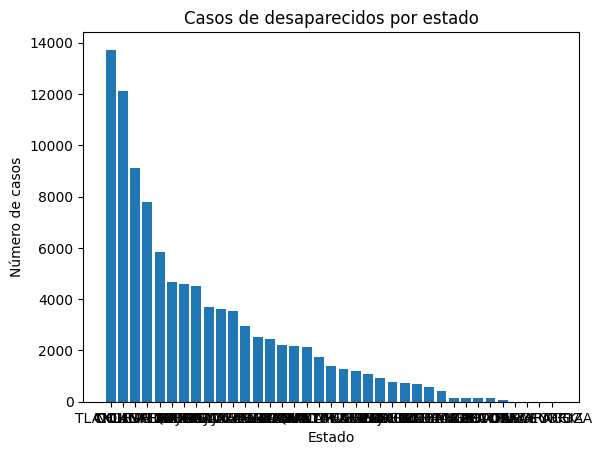

In [ ]:
# plot bar graph
plt.bar(x, y)
plt.xlabel('Estado')
plt.ylabel('Número de casos')
plt.title('Casos de desaparecidos por estado')

<Axes: title={'center': 'Casos de Personas desaparecidas por Estado'}, xlabel='ESTADO'>

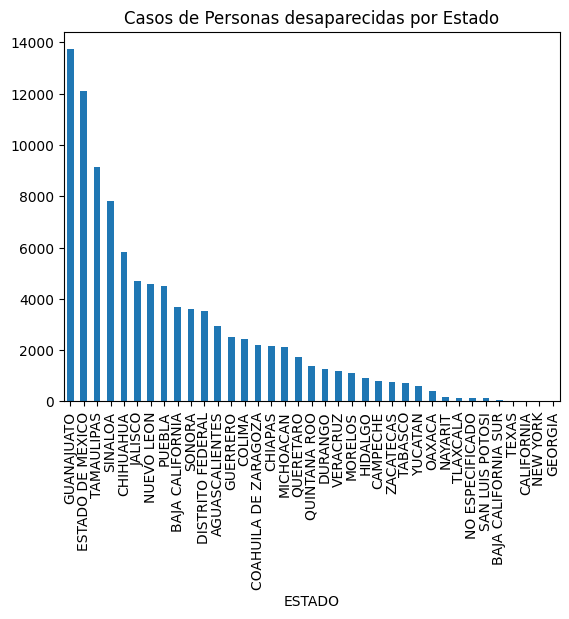

In [ ]:
df['ESTADO'].value_counts().plot.bar(title='Casos de Personas desaparecidas por Estado')

<Axes: title={'center': 'Casos de Personas desaparecidas por Estado Top 12'}, xlabel='ESTADO'>

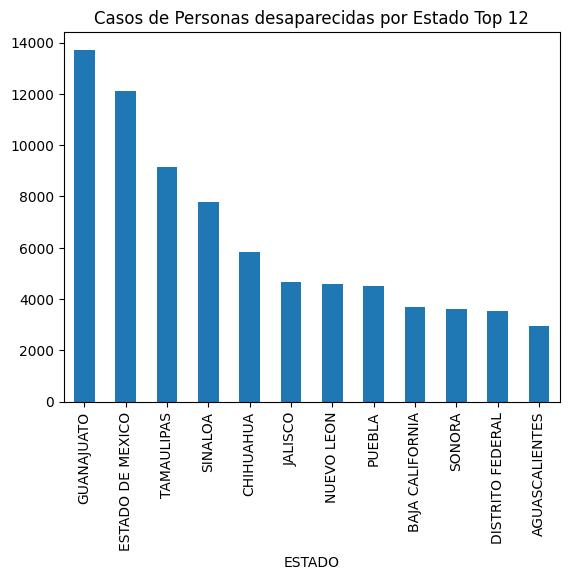

In [ ]:
df['ESTADO'].value_counts().head(12).plot.bar(title='Casos de Personas desaparecidas por Estado Top 12')

Análisis exploratorio de la variale 'SEXO'

In [ ]:
#para contar el numero de registros con identificación vacío en el dataframe
sexo_nulls=df['SEXO'].isnull().sum()
sexo_nulls

1

Existe un caso sin determinación del sexo del Estado de Morelos

In [ ]:
#para asegurarse que los valores Nan sean rellenados con valores válidos en caso de existir valores faltantes seguidos se optó por usar el método BackFill que incluye al siguiente valor válido en la secuencia luego del valor perdido.
df['SEXO'].fillna(method='bfill', inplace=True)

In [ ]:
df['SEXO'].unique()

array(['FEMENINO', 'MASCULINO'], dtype=object)

In [ ]:
estado_sexo=df[['ESTADO', 'SEXO']]

In [ ]:
estado_sexo.head()

,ESTADO,SEXO
0,TLAXCALA,FEMENINO
1,COLIMA,FEMENINO
2,TLAXCALA,MASCULINO
3,COLIMA,FEMENINO
4,COLIMA,FEMENINO


In [ ]:
#para contar el numero de casos por género y estado
estado_sexo[estado_sexo['SEXO']=='MASCULINO'].value_counts()

ESTADO                SEXO     
TAMAULIPAS            MASCULINO    6188
GUANAJUATO            MASCULINO    5974
SINALOA               MASCULINO    5669
ESTADO DE MEXICO      MASCULINO    5658
CHIHUAHUA             MASCULINO    4495
JALISCO               MASCULINO    3732
NUEVO LEON            MASCULINO    3052
SONORA                MASCULINO    2103
PUEBLA                MASCULINO    1947
BAJA CALIFORNIA       MASCULINO    1804
DISTRITO FEDERAL      MASCULINO    1789
COAHUILA DE ZARAGOZA  MASCULINO    1725
GUERRERO              MASCULINO    1693
MICHOACAN             MASCULINO    1441
COLIMA                MASCULINO    1219
AGUASCALIENTES        MASCULINO    1097
QUERETARO             MASCULINO     801
DURANGO               MASCULINO     781
CHIAPAS               MASCULINO     757
VERACRUZ              MASCULINO     685
ZACATECAS             MASCULINO     592
MORELOS               MASCULINO     524
QUINTANA ROO          MASCULINO     481
HIDALGO               MASCULINO     359
YUCATAN 

In [ ]:
#para contar el numero de casos por género y estado
estado_sexo[estado_sexo['SEXO']=='FEMENINO'].value_counts()

ESTADO                SEXO    
GUANAJUATO            FEMENINO    7750
ESTADO DE MEXICO      FEMENINO    6439
TAMAULIPAS            FEMENINO    2940
PUEBLA                FEMENINO    2570
SINALOA               FEMENINO    2129
BAJA CALIFORNIA       FEMENINO    1895
AGUASCALIENTES        FEMENINO    1851
DISTRITO FEDERAL      FEMENINO    1732
NUEVO LEON            FEMENINO    1547
SONORA                FEMENINO    1503
CHIAPAS               FEMENINO    1416
CHIHUAHUA             FEMENINO    1341
COLIMA                FEMENINO    1235
JALISCO               FEMENINO     950
QUERETARO             FEMENINO     939
QUINTANA ROO          FEMENINO     908
GUERRERO              FEMENINO     822
MICHOACAN             FEMENINO     693
MORELOS               FEMENINO     571
HIDALGO               FEMENINO     548
CAMPECHE              FEMENINO     548
VERACRUZ              FEMENINO     510
DURANGO               FEMENINO     494
COAHUILA DE ZARAGOZA  FEMENINO     492
TABASCO               FEMENINO   

In [ ]:
#creación de dataframe por estado y sexo
estado_sexo_df = pl.DataFrame(
    {
        "estado": ["Tamaulipas", "Guanajuato", "Sinaloa","Estado de Mexico","Chihuahua","Jalisco","Nuevo León","Sonora", "Puebla","Baja California","Distrito Federal","Coahuila","Guerrero","Michoacan","Colima","AguasCalientes","Queretaro","Durango","Chiapas","Veracruz","Zacatecas","Morelos","QuintanaRoo","Hidalgo","Yucatan","Tabasco","Campeche"],
        "sexo masculino": [6188,5974,5669,5658,4495,3732,3052,2103,1947,1804,1789,1725,1693,1441,1219,1097,801,781,757,685,592,524,481,359,253,250,237],
        "sexo femenino": [2940,7750,2129, 6439,1341,950,1547,1503,2570,1895,1732,492,822,693,1235,1851,939,494,1416,510,149,571,908,548,333,456,548],
    }
)

fig = px.bar(estado_sexo_df, x="estado", y=["sexo masculino", "sexo femenino"], title="Cantidad de víctimas por estado y género", width= 800, height= 600)
fig.show()

Análisis exploratorio de las relaciones de víctimas con los grupos delictivos

In [ ]:
df['RELACIÓN CON GRUPOS DELICTIVOS'].unique()

array(['NO', 'SI'], dtype=object)

In [ ]:
estado_delictivo=df[['ESTADO', 'RELACIÓN CON GRUPOS DELICTIVOS']]

In [ ]:
estado_delictivo.head()

,ESTADO,RELACIÓN CON GRUPOS DELICTIVOS
0,TLAXCALA,NO
1,COLIMA,NO
2,TLAXCALA,NO
3,COLIMA,NO
4,COLIMA,NO


In [ ]:
#estado_delictivo['RELACIÓN CON GRUPOS DELICTIVOS']=='SI'.value_counts()
estado_delictivo[estado_delictivo['RELACIÓN CON GRUPOS DELICTIVOS']=='SI'].value_counts()

ESTADO                RELACIÓN CON GRUPOS DELICTIVOS
CHIHUAHUA             SI                                1013
COAHUILA DE ZARAGOZA  SI                                 102
SONORA                SI                                  41
JALISCO               SI                                  12
ZACATECAS             SI                                   6
OAXACA                SI                                   4
MICHOACAN             SI                                   4
CHIAPAS               SI                                   3
TAMAULIPAS            SI                                   3
COLIMA                SI                                   2
SINALOA               SI                                   2
YUCATAN               SI                                   2
BAJA CALIFORNIA       SI                                   2
DURANGO               SI                                   1
GUANAJUATO            SI                                   1
DISTRITO FEDERAL      SI        

En el estado donde más casos relacionados con grupos delictivos hay corresponde a Chihuahua

<Axes: title={'center': 'Casos Personas desaparecidas por Estado y estado delictivo Top 10'}, xlabel='ESTADO,RELACIÓN CON GRUPOS DELICTIVOS'>

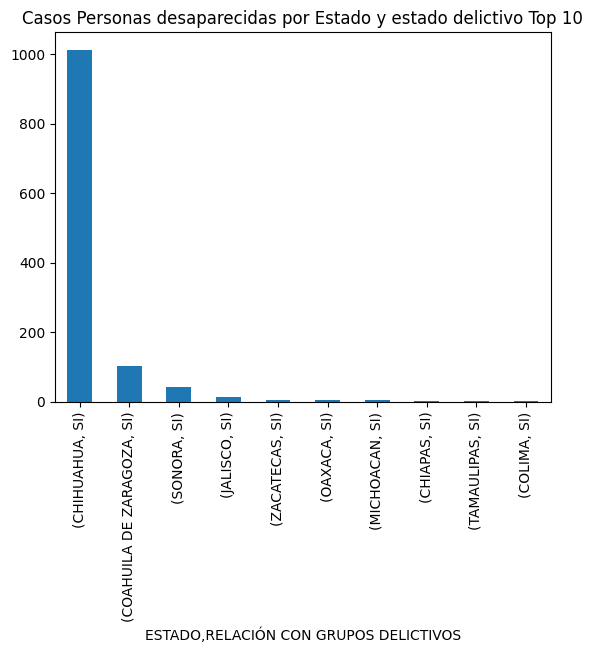

In [ ]:
estado_delictivo[estado_delictivo['RELACIÓN CON GRUPOS DELICTIVOS']=='SI'].value_counts().head(10).plot.bar(title='Casos Personas desaparecidas por Estado y estado delictivo Top 10')

In [ ]:
x=['Chihuahua', 'Coahuila', 'Sonora', 'Jalisco','Zacatecas','Oaxaca','Michoacan']
fig = go.Figure(go.Bar(x=x, y=[4823,2115,3565,4670,735,413,2130], name='víctimas no relacionadas con grupos delictivos'))
fig.add_trace(go.Bar(x=x, y=[1013,102,41,12,6,4,4], name='víctimas relacionadas con grupos delictivos'))

fig.update_layout(barmode='stack', xaxis={'categoryorder':'array', 'categoryarray':['Chihuahua','Coahuila','Sonora','Jalisco','Zacatecas','Oaxaca','Michoacan']})
fig.show()

De todos los estados los únicos cuyos casos de víctimas relacionadas con grupos delictivos son representativos son Chihuahua(17%) y Coahuila(5%), mientras las restantes incluye una cantidad de casos muy marginal.

# Pre-procesamiento de datos

Preprocesamiento de fechas principales

Preprocesamiento de Fecha Reporte

In [ ]:
fecha_rep_blanks=df['FECHA REPORTE'].isna().sum()

In [ ]:
# format specification
#format = '%Y-%m-%d %H:%M:%S'
format = '%m-%d-%y %H:%M:%S'

In [ ]:
#string = date_time.strftime(format)
df['fecha_rep'] = df['FECHA REPORTE'].dt.strftime(format)#para volver la fecha a string

In [ ]:
df['fecha_rep'].head(10)

0    10-12-11 00:00:00
1    01-03-12 00:00:00
2    12-19-11 00:00:00
3    01-02-12 00:00:00
4    01-06-12 00:00:00
5    02-09-12 00:00:00
6    02-10-12 00:00:00
7    02-13-12 00:00:00
8    02-21-12 00:00:00
9    01-03-12 00:00:00
Name: fecha_rep, dtype: object

In [ ]:
df['fecha_reporte']=df['fecha_rep'].str[:8]#para separar la porción correspondiente a la fecha

In [ ]:
df['fecha_reporte'].head(15)

0     10-12-11
1     01-03-12
2     12-19-11
3     01-02-12
4     01-06-12
5     02-09-12
6     02-10-12
7     02-13-12
8     02-21-12
9     01-03-12
10    01-31-12
11    02-15-12
12    03-12-12
13    03-14-12
14    03-23-12
Name: fecha_reporte, dtype: object

In [ ]:
# Concatenar las columnas 'FECHA REP' y 'HORA REPORTE' en una sola columna 'fecha_hora_rep'
df['fecha_hora_reporte'] = pd.to_datetime(df['fecha_reporte'].astype(str) + ' ' +df['HORA REPORTE'].astype(str))

<ipython-input-34-e3cd5845feae>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df['fecha_hora_reporte'].head(10)

0   2011-10-12 10:30:00
1   2012-01-03 10:00:00
2   2011-12-19 11:20:00
3   2012-01-02 11:41:00
4   2012-01-06 12:00:00
5   2012-02-09 11:00:00
6   2012-02-10 11:20:00
7   2012-02-13 10:20:00
8   2012-02-21 02:00:00
9   2012-01-03 05:50:00
Name: fecha_hora_reporte, dtype: datetime64[ns]

Preprocesamiento Fecha Evento

In [ ]:
fecha_eve_blanks=df['FECHA EVENTO'].isna().sum()
fecha_eve_blanks

2

In [ ]:
hora_eve_blanks=df['HORA EVENTO'].isna().sum()
hora_eve_blanks

13

Eliminación de registros donde la fecha u hora del evento tengan espacios vacíos

In [ ]:
#para eliminar los registros de los valores Null de la fecha de evento
df = df.dropna(subset=['FECHA EVENTO'])
fecha_eve_blanks=df['FECHA EVENTO'].isna().sum()
fecha_eve_blanks

0

In [ ]:
#para eliminar los registros de los valores Null de la hora de evento
df = df.dropna(subset=['HORA EVENTO'])
hora_eve_blanks=df['HORA EVENTO'].isna().sum()
hora_eve_blanks

0

Pre procesamiento de la fecha del evento

In [ ]:
df['fecha_eve'] = df['FECHA EVENTO'].dt.strftime(format)#para volver la fecha a tipo string

In [ ]:
df['fecha_eve'].head(10)

0    02-09-09 00:00:00
1    12-28-11 00:00:00
2    12-17-11 00:00:00
3    12-14-11 00:00:00
4    01-05-12 00:00:00
5    02-06-12 00:00:00
6    02-09-12 00:00:00
7    02-11-12 00:00:00
8    02-20-12 00:00:00
9    12-27-11 00:00:00
Name: fecha_eve, dtype: object

In [ ]:
df['fecha_evento']=df['fecha_eve'].str[:8]#para rescatar el valor correspondiente a la fecha

In [ ]:
df['fecha_evento'].head(10)

0    02-09-09
1    12-28-11
2    12-17-11
3    12-14-11
4    01-05-12
5    02-06-12
6    02-09-12
7    02-11-12
8    02-20-12
9    12-27-11
Name: fecha_evento, dtype: object

In [ ]:
# Concatenar las columnas 'FECHA EVENTO' y 'HORA EVENTO' en una sola columna 'fecha_hora_evento'
df['fecha_hora_evento'] = pd.to_datetime(df['fecha_evento'].astype(str) + ' ' +df['HORA EVENTO'].astype(str))

<ipython-input-44-82665f484031>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df['fecha_hora_evento'].head(10)

0   2009-02-09 02:30:00
1   2011-12-28 12:00:00
2   2011-12-17 09:00:00
3   2011-12-14 11:00:00
4   2012-01-05 11:15:00
5   2012-02-06 12:00:00
6   2012-02-09 09:13:00
7   2012-02-11 11:00:00
8   2012-02-20 01:13:00
9   2011-12-27 07:00:00
Name: fecha_hora_evento, dtype: datetime64[ns]

Preprocesamiento de fecha de último avistamiento

In [ ]:
#para contar el numero de registros con identificación vacío en el atributo 'FECHA DE ÚLTIMO AVISTAMIENTO'en el dataframe
fecha_ult_avis_nulls=df['FECHA DE ÚLTIMO AVISTAMIENTO'].isnull().sum()
fecha_ult_avis_nulls

2421

In [ ]:
#Para contar los registros vacíos de hora del último avistamiento
hora_ult_avis_blanks=df['HORA DE ÚLTIMO AVISTAMIENTO'].isna().sum()
hora_ult_avis_blanks

11886

In [ ]:
#uso del método fillna para reemplazar valores nan de la fecha de último avistamiento por sus valores pares de la fecha del evento
df['FECHA DE ÚLTIMO AVISTAMIENTO']= df['FECHA DE ÚLTIMO AVISTAMIENTO'].fillna(df['FECHA EVENTO'])

In [ ]:
fecha_ult_avis_nulls1=df['FECHA DE ÚLTIMO AVISTAMIENTO'].isnull().sum()#Para verificar que el inputation correcto en las fechas de último avistamiento
fecha_ult_avis_nulls1

0

In [ ]:
#uso del método fillna para reemplazar valores nan de la hora de último avistamiento por sus valores pares de la hora del evento
df['HORA DE ÚLTIMO AVISTAMIENTO']=df['HORA DE ÚLTIMO AVISTAMIENTO'].fillna(df['HORA EVENTO'])

In [ ]:
hora_ult_avis_blanks1=df['HORA DE ÚLTIMO AVISTAMIENTO'].isna().sum()#Para verificar que el inputation correcto en las horas de último avistamiento
hora_ult_avis_blanks1

0

In [ ]:
# para obtener los registros cuya fecha de último avistamiento fueron registrados bajo la fecha exclusiva '2000-01-01'
filtrado_ult_avis=df[df['FECHA DE ÚLTIMO AVISTAMIENTO']=='2000-01-01']
value_counts_filtrado_ult_avis=filtrado_ult_avis['ESTADO'].value_counts()
value_counts_filtrado_ult_avis


ESTADO
GUANAJUATO              12942
TAMAULIPAS               4165
ESTADO DE MEXICO          682
SINALOA                   661
BAJA CALIFORNIA           537
TABASCO                   485
MICHOACAN                 282
DISTRITO FEDERAL          272
VERACRUZ                  154
CHIHUAHUA                  76
NO ESPECIFICADO            72
QUINTANA ROO               63
COAHUILA DE ZARAGOZA       53
HIDALGO                    38
JALISCO                    36
MORELOS                    31
CAMPECHE                   26
NUEVO LEON                 21
QUERETARO                  20
NAYARIT                    15
COLIMA                     15
OAXACA                     13
PUEBLA                     13
DURANGO                    12
SAN LUIS POTOSI             7
SONORA                      6
ZACATECAS                   4
AGUASCALIENTES              4
CHIAPAS                     2
GUERRERO                    1
BAJA CALIFORNIA SUR         1
TLAXCALA                    1
Name: count, dtype: int64

Existen 20700 casos de fecha de último avistamiento correspondiente a 2001-01-01 creando una distorsión en el uso de esta variable en alrrededor del 21%

In [ ]:
#para reemplazar las fechas con valor '2000-01-01' con sus pares en la 'FECHA REPORTE'
df.loc[df['FECHA DE ÚLTIMO AVISTAMIENTO']=='2000-01-01','FECHA DE ÚLTIMO AVISTAMIENTO'] = df['FECHA REPORTE']

In [ ]:
#para verificar que las fechas con valores'2000-01-01' se hayan reemplazado por sus pares en la columna 'FECHA REPORTE'
filtrado_ult_avis=df[df['FECHA DE ÚLTIMO AVISTAMIENTO']=='2000-01-01']
value_counts_filtrado_ult_avis=filtrado_ult_avis['ESTADO'].value_counts()
value_counts_filtrado_ult_avis

Series([], Name: count, dtype: int64)

In [ ]:
#string = date_time.strftime(format)
df['fecha_ult_avis'] = df['FECHA DE ÚLTIMO AVISTAMIENTO'].dt.strftime(format)#para volver la fecha de último avistamiento a string

In [ ]:
df['fecha_ult_avis'].head(10)

0    02-09-11 00:00:00
1    12-28-11 00:00:00
2    12-17-11 00:00:00
3    12-14-11 00:00:00
4    03-01-12 00:00:00
5    02-06-12 00:00:00
6    02-09-12 00:00:00
7    02-11-12 00:00:00
8    02-20-12 00:00:00
9    12-27-12 00:00:00
Name: fecha_ult_avis, dtype: object

In [ ]:
df['fecha_avistamiento']=df['fecha_ult_avis'].str[:8]#para separar la porción correspondiente a la fecha en la fecha de último avistamiento

In [ ]:
df['fecha_avistamiento'].head(15)

0     02-09-11
1     12-28-11
2     12-17-11
3     12-14-11
4     03-01-12
5     02-06-12
6     02-09-12
7     02-11-12
8     02-20-12
9     12-27-12
10    01-23-12
11    02-14-12
12    12-03-12
13    03-14-12
14    03-13-12
Name: fecha_avistamiento, dtype: object

In [ ]:
# Concatener las columnas 'FECHA DE ÚLTIMO AVISTAMIENTO' y 'HORA DE ÚLTIMO AVISTAMIENTO' en una sola columna 'fecha_hora_avistamiento'
df['fecha_hora_avistamiento'] = pd.to_datetime(df['fecha_avistamiento'].astype(str) + ' ' +df['HORA DE ÚLTIMO AVISTAMIENTO'].astype(str))


<ipython-input-59-e64889b4325b>:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [ ]:
df['fecha_hora_avistamiento'].head(10)

0   2011-02-09 02:30:00
1   2011-12-28 12:00:00
2   2011-12-17 09:00:00
3   2011-12-14 12:00:00
4   2012-03-01 12:00:00
5   2012-02-06 12:00:00
6   2012-02-09 12:00:00
7   2012-02-11 11:00:00
8   2012-02-20 01:30:00
9   2012-12-27 07:00:00
Name: fecha_hora_avistamiento, dtype: datetime64[ns]

**Análisis Exploratorio de las variales peso y estatura**


In [ ]:
#para contar el numero de registros con la información de peso vacíos en el dataframe
peso_nulls=df['PESO'].isnull().sum()
peso_nulls

2825

In [ ]:
count0_peso = df.loc[df['PESO'] == 0, 'PESO'].value_counts()
count0_peso

PESO
0.0    56718
Name: count, dtype: int64

Entre nulos y valores con cero se totalizan 59543 registros que equivalen al 66% del total

In [ ]:
#para contar el numero de registros con la información de estatura vacíos en el dataframe
estatura_nulls=df['ESTATURA'].isnull().sum()
estatura_nulls

1638

In [ ]:
count0_estatura = df.loc[df['ESTATURA'] == 0, 'ESTATURA'].value_counts()
count0_estatura

ESTATURA
0.0    33803
Name: count, dtype: int64

Entre valores nulo y valores con cero existen 35441 registros que representa el 37% del total

**Análisis exploratorio de las variable Estado y Estado localizado que corresponden al estado donde se produjo el evento y donde fue localizada la persona**


In [ ]:
#Para contar los valores no especificados en el atributo Estado
count_noespecificado_estado = df.loc[df['ESTADO'] == 'NO ESPECIFICADO','ESTADO'].value_counts()
count_noespecificado_estado

ESTADO
NO ESPECIFICADO    138
Name: count, dtype: int64

In [ ]:
#Para contar el número de casos no especificados en el Estado donde se localizó a la persona posteriormente
count_estado_localizado_no_especificado=df.loc[df['ESTADO (LOCALIZADO)']=='NO ESPECIFICADO','ESTADO (LOCALIZADO)'].value_counts()
count_estado_localizado_no_especificado

ESTADO (LOCALIZADO)
NO ESPECIFICADO    11713
Name: count, dtype: int64

In [ ]:
#para contar los valores 'nan' en la columna 'ESTADO (LOCALIZADO)'
estado_localizado_nulls=df['ESTADO (LOCALIZADO)'].isnull().sum()
estado_localizado_nulls

35091

Inputación de valores 'Nan' en la variable 'ESTADO (LOCALIZADO)'

In [ ]:
#para reemplzar los valores 'nan' en la columna 'ESTADO (LOCALIZADO)'
df['ESTADO (LOCALIZADO)'].fillna('AUN SIN LOCALIZAR', inplace =True)

In [ ]:
#para verificar que los valores NaN hayan sido reemplazados
for value in df['ESTADO (LOCALIZADO)'].unique():
    print(value)

NO ESPECIFICADO
COLIMA
TLAXCALA
JALISCO
CHIHUAHUA
ESTADO DE MEXICO
NUEVO LEON
HIDALGO
DURANGO
QUERETARO
AUN SIN LOCALIZAR
SINALOA
PUEBLA
DISTRITO FEDERAL
BAJA CALIFORNIA
TAMAULIPAS
YUCATAN
VERACRUZ
TABASCO
CAMPECHE
GUERRERO
CHIAPAS
QUINTANA ROO
MORELOS
MICHOACAN
GUANAJUATO
ZACATECAS
SAN LUIS POTOSI
OAXACA
COAHUILA DE ZARAGOZA
TEXAS
SONORA
BAJA CALIFORNIA SUR
NAYARIT
AGUASCALIENTES
NEW MEXICO
WISCONSIN
ARIZONA
GUATEMALA


Análisis Exploratorio y pre procesamiento de la variable edad

In [ ]:
filtrado_estado=df[df['ESTADO']== 'GUANAJUATO']

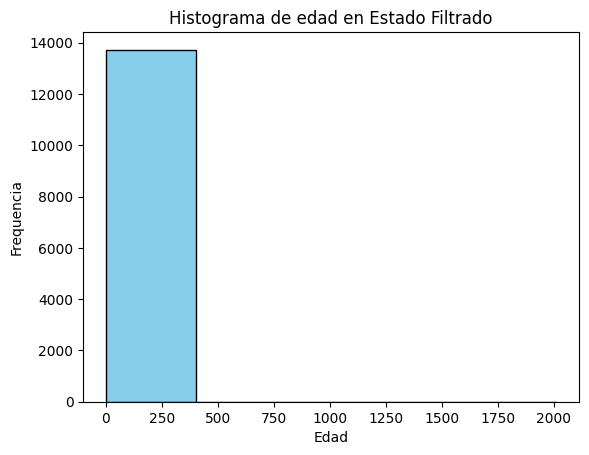

In [ ]:
plt.hist(filtrado_estado['EDAD'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histograma de edad en Estado Filtrado')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.show()

Debido a que existen indicios de que las edades en promedio se encuentran distorsionadas por pocos outliers, se procede a realizar un análisis exploratorio de esta variable

In [ ]:
filtrado_estado['EDAD'].describe()

count    13724.000000
mean        24.190688
std         23.133707
min          0.000000
25%         15.000000
50%         18.000000
75%         30.000000
max       2013.000000
Name: EDAD, dtype: float64

In [ ]:
filtrado_edad=df[df['EDAD']>90]
value_counts_filtrado_edad=filtrado_edad['EDAD'].value_counts()
value_counts_filtrado_edad

EDAD
91.0      24
92.0      23
93.0      17
94.0      14
97.0       7
95.0       7
98.0       6
96.0       4
2013.0     3
99.0       2
118.0      1
250.0      1
3454.0     1
100.0      1
501.0      1
106.0      1
110.0      1
172.0      1
104.0      1
102.0      1
103.0      1
444.0      1
2017.0     1
117.0      1
346.0      1
Name: count, dtype: int64

Se puede observar 122 registros con edades superiores a 90 años llegando a superar inclusive la barrera de los 3000 años, los cuales se pueden considerar como valores anómalos o potenciales errores

In [ ]:
fecha_nac_nulls=df['FECHA DE NACIMIENTO'].isnull().sum()
fecha_nac_nulls

3839

Dado que existen 3839 registros con fecha de nacimiento vacío, es más viable rellenar la columna de edades con valores vacíos con aquellas que sean las siguientes mediante el método Bfill considerando que se trata de eventos independientes.

In [ ]:
#Para reemplazar los valores de edades superiores a 90 años con Nan
#df['EDAD']>90
df[df['EDAD']>90] = np.nan

In [ ]:
#para verificar la transformación de edades
filtrado_edad=df[df['EDAD']>90]
value_counts_filtrado_edad=filtrado_edad['EDAD'].value_counts()
value_counts_filtrado_edad

Series([], Name: count, dtype: int64)

In [ ]:
edad_nan_count = df['EDAD'].isna().sum()
edad_nan_count

568

En total las edades erróneas más las que constan con valor NULL suman 568. Estas serán reempladas con el método back fill.

In [ ]:
#para identificar los valores asignados a la variable edad
for value in df['EDAD'].unique():
    print(value)

13.0
18.0
24.0
15.0
26.0
14.0
17.0
27.0
19.0
16.0
21.0
29.0
12.0
34.0
52.0
31.0
41.0
28.0
3.0
30.0
9.0
57.0
35.0
70.0
4.0
23.0
0.0
44.0
22.0
2.0
38.0
25.0
42.0
20.0
69.0
40.0
32.0
61.0
67.0
1.0
50.0
59.0
10.0
48.0
36.0
56.0
11.0
33.0
8.0
6.0
46.0
45.0
51.0
75.0
55.0
39.0
49.0
53.0
37.0
77.0
43.0
73.0
nan
86.0
47.0
58.0
54.0
63.0
62.0
72.0
82.0
66.0
65.0
85.0
60.0
68.0
71.0
64.0
74.0
7.0
80.0
81.0
5.0
84.0
78.0
83.0
76.0
88.0
87.0
79.0
89.0
90.0


In [ ]:
#para asegurarse que todos los valores Nan sean rellenados con valores válidos en caso de existir valores faltantes seguidos se optó por usar el método BackFill que incluye al siguiente valor válido en la secuencia luego del valor perdido.
df['EDAD'].fillna(method='bfill', inplace=True)

In [ ]:
#para verificar la ausencia de valores Nan en la variable Edad
for value in df['EDAD'].unique():
    print(value)

13.0
18.0
24.0
15.0
26.0
14.0
17.0
27.0
19.0
16.0
21.0
29.0
12.0
34.0
52.0
31.0
41.0
28.0
3.0
30.0
9.0
57.0
35.0
70.0
4.0
23.0
0.0
44.0
22.0
2.0
38.0
25.0
42.0
20.0
69.0
40.0
32.0
61.0
67.0
1.0
50.0
59.0
10.0
48.0
36.0
56.0
11.0
33.0
8.0
6.0
46.0
45.0
51.0
75.0
55.0
39.0
49.0
53.0
37.0
77.0
43.0
73.0
86.0
47.0
58.0
54.0
63.0
62.0
72.0
82.0
66.0
65.0
85.0
60.0
68.0
71.0
64.0
74.0
7.0
80.0
81.0
5.0
84.0
78.0
83.0
76.0
88.0
87.0
79.0
89.0
90.0


Visualización de las edades promedio por estado de las víctimas por estado

<Axes: title={'center': 'promedio de edades por Estado Top 40'}, xlabel='ESTADO'>

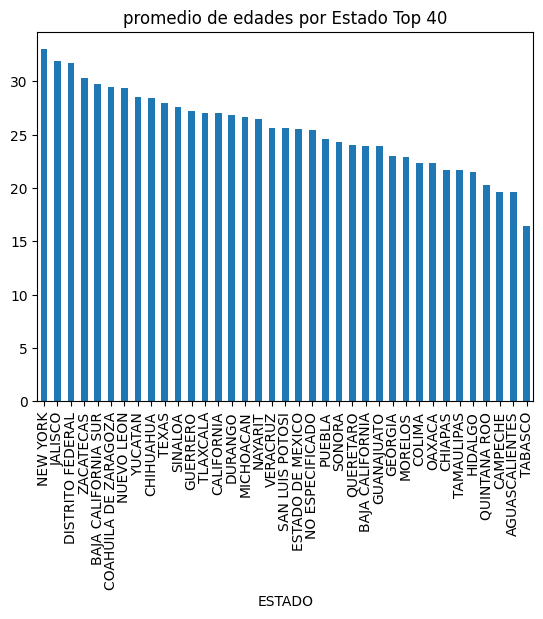

In [ ]:
df['EDAD'].groupby(df['ESTADO']).mean().sort_values(ascending=False).head(40).plot.bar(title='promedio de edades por Estado Top 40')

En el gráfico se puede observar que solo en dos estados la edad promedio es ligeramente superior a 30 años, mientras que adultos entre 25 y 30 años en promedio corresponden a 15 estados, al igual que las edades comprendidas entre 20 y 25 años. Finalmente, existen 4 estados donde las víctimas son adolescentes siendo estos Quintana Roo, Campeche, Aguascalientes y Tabasco

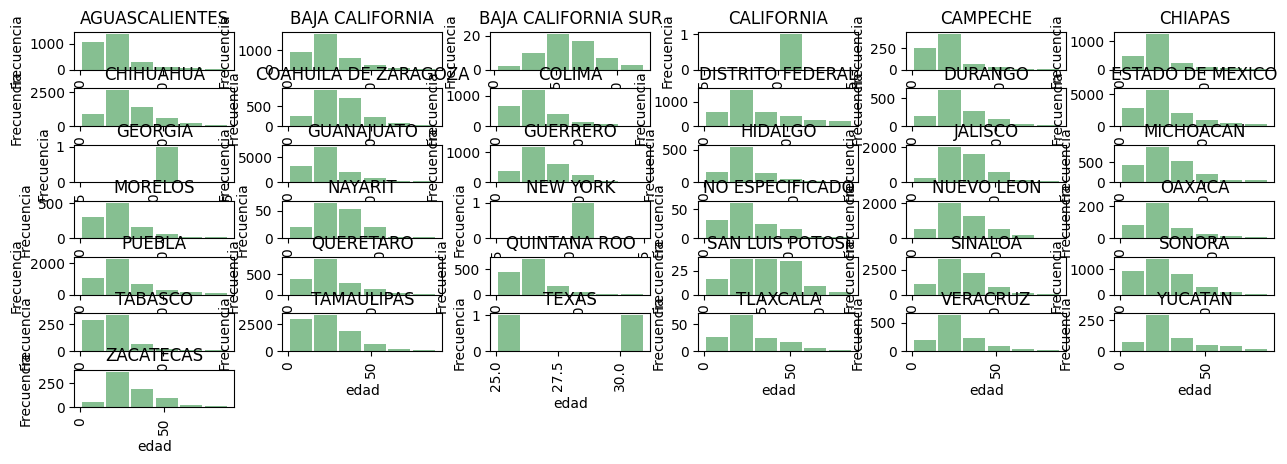

In [ ]:
df['EDAD'].hist(by=df['ESTADO'], bins=6, grid=False, figsize=(15,5), color='#86bf91', zorder=2, rwidth=0.9)
# titulo y etiquetas
for ax in plt.gcf().axes:
   ax.set_xlabel('edad')
   ax.set_ylabel('Frecuencia')

Al crear los histogamas de edades por estado se observa el mismo patrón de la media como medida de tendencia a nivel general que corresponde a población joven típicamente entre 20 y 30 años de edad salvo California donde apenas corresponde a un caso

# SECCIÓN DE TRANSFORMACIONES

**Transformación de fecha de reporte y fecha del evento**

Cálculo de tiempo en horas entre fecha de reporte y fecha de evento

In [ ]:
df['delta']=df['fecha_hora_reporte']-df['fecha_hora_evento']
df['delta'].head(10)

0   975 days 08:00:00
1     5 days 22:00:00
2     2 days 02:20:00
3    19 days 00:41:00
4     1 days 00:45:00
5     2 days 23:00:00
6     1 days 02:07:00
7     1 days 23:20:00
8     1 days 00:47:00
9     6 days 22:50:00
Name: delta, dtype: timedelta64[ns]

In [ ]:
print(df['delta'].dtypes)

timedelta64[ns]


In [ ]:
#para convertir el delta del tiempo entre el evento y el reporte a segundos
#df['delta_s'] = df['delta'].astype('timedelta64[s]')
df['delta_s'] = df['delta'].dt.total_seconds()
df['delta_s'].head()

0    84268800.0
1      511200.0
2      181200.0
3     1644060.0
4       89100.0
Name: delta_s, dtype: float64

In [ ]:
#para convertir el delta del tiempo en segundos a horas
df['delta_horas']=(df['delta_s']/3600)
df['delta_horas'].head(10)

0    23408.000000
1      142.000000
2       50.333333
3      456.683333
4       24.750000
5       71.000000
6       26.116667
7       47.333333
8       24.783333
9      166.833333
Name: delta_horas, dtype: float64

In [ ]:
df['delta_horas'].groupby(df['ESTADO']).mean()

ESTADO
AGUASCALIENTES            271.142506
BAJA CALIFORNIA         35800.053395
BAJA CALIFORNIA SUR      3612.069097
CALIFORNIA                  0.516667
CAMPECHE                 3751.551004
CHIAPAS                  1959.187277
CHIHUAHUA                1813.434312
COAHUILA DE ZARAGOZA    10177.405399
COLIMA                    570.823862
DISTRITO FEDERAL         3089.254633
DURANGO                  2120.964303
ESTADO DE MEXICO         1441.981082
GEORGIA                     0.000000
GUANAJUATO                430.611649
GUERRERO                 2407.619090
HIDALGO                  3291.031515
JALISCO                  1730.993963
MICHOACAN                1519.237678
MORELOS                  2498.227285
NAYARIT                  7167.036567
NEW YORK                   96.000000
NO ESPECIFICADO          6819.757232
NUEVO LEON               5549.018572
OAXACA                   1682.229738
PUEBLA                    670.029373
QUERETARO                1876.472820
QUINTANA ROO              431.7

In [ ]:
#para obtener la cantidad de registros que supera los 30 días de gap de reporte
df[df['delta_horas'] > 720].shape[0]

17147

In [ ]:
#para obtener la cantidad de registros que supera los 180 días de gap de reporte
df[df['delta_horas'] > 4320].shape[0]

8228

In [ ]:
#para obtener la cantidad de registros que supera los 720 días de gap de reporte
df[df['delta_horas'] > 17280].shape[0]

3857

Creación de un box plot sobre el delta de horas entre el tiempo de reporte vs el tiempo del evento

<Axes: ylabel='delta_horas'>

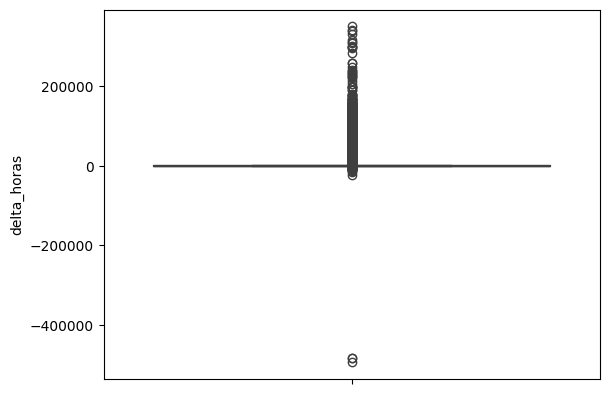

In [ ]:
sns.boxplot(df['delta_horas'])

In [ ]:
#para visualizar los registros con valores negativos de duración de delta negativo
df['delta_horas_negativo']=df['delta_horas']<0
df['delta_horas_negativo'].value_counts()

delta_horas_negativo
False    95574
True      3540
Name: count, dtype: int64

In [ ]:
filtro_delta_horas_negativo=df[df['delta_horas']<0]
value_counts_filto_delta_horas_negativo=filtro_delta_horas_negativo['FECHA EVENTO'].value_counts()
value_counts_filto_delta_horas_negativo

FECHA EVENTO
2008-11-10    16
2014-03-10    11
2014-05-19    11
2014-01-24    10
2014-06-20    10
              ..
2014-02-13     1
2012-08-18     1
2014-11-13     1
2011-11-10     1
2018-04-23     1
Name: count, Length: 1896, dtype: int64

Los deltas negativos se producen por cuanto la hora del evento registrado es el medio día y la hora del reporte son horas de la mañana del mismo día

In [ ]:
#para visualizar los registros con valores negativos de duración de delta negativo
df['delta_horas_negativo24']=df['delta_horas']<-24
df['delta_horas_negativo24'].value_counts()

delta_horas_negativo24
False    99037
True        77
Name: count, dtype: int64

En algunos del los 77 registros se observa como constan registros de reporte con hasta meses de anterioridad a la fecha del evento.

In [ ]:
filtro_delta_horas_negativo24=df[df['delta_horas']<-24]
value_counts_filto_delta_horas_negativo24=filtro_delta_horas_negativo24['FECHA EVENTO'].value_counts()
value_counts_filto_delta_horas_negativo24

FECHA EVENTO
2012-01-25    5
2009-03-11    2
2012-01-23    2
2007-10-12    2
2007-09-04    2
             ..
2009-06-08    1
2010-03-08    1
2008-11-08    1
2010-11-04    1
1972-05-01    1
Name: count, Length: 66, dtype: int64

Eliminación de registros de deltas de tiempo negativos menores a 24 horas

In [ ]:
#para eliminar los registros de los delta de tiempo negativo menores a 24 horas
df = df.drop(df[df['delta_horas'] < -24].index)
filtro_delta_horas_negativo24

,SITUACION DE LA PERSONA EN EL REGISTRO NACIONAL,FECHA REPORTE,HORA REPORTE,FECHA EVENTO,HORA EVENTO,ESTADO,CLAVE ESTADO,MUNICIPIO,CLAVE MUNICIPIO,NACIONALIDAD,...,fecha_evento,fecha_hora_evento,fecha_ult_avis,fecha_avistamiento,fecha_hora_avistamiento,delta,delta_s,delta_horas,delta_horas_negativo,delta_horas_negativo24
34,DESAPARECIDO,2012-01-31,03:40:00,2012-03-27,06:00:00,COLIMA,6.0,MANZANILLO,7.0,MEXICANA,...,03-27-12,2012-03-27 06:00:00,01-27-12 00:00:00,01-27-12,2012-01-27 06:00:00,-57 days +21:40:00,-4.846800e+06,-1346.333333,True,True
71,DESAPARECIDO,2010-10-22,12:00:00,2010-11-04,12:00:00,CHIHUAHUA,8.0,JUAREZ,37.0,MEXICANA,...,11-04-10,2010-11-04 12:00:00,11-04-10 00:00:00,11-04-10,2010-11-04 12:00:00,-13 days +00:00:00,-1.123200e+06,-312.000000,True,True
365,DESAPARECIDO,2009-05-18,12:00:00,2009-12-01,12:00:00,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,MEXICANA,...,12-01-09,2009-12-01 12:00:00,12-01-09 00:00:00,12-01-09,2009-12-01 12:00:00,-197 days +00:00:00,-1.702080e+07,-4728.000000,True,True
563,DESAPARECIDO,2011-10-24,05:42:00,2011-11-04,12:00:00,DURANGO,10.0,DURANGO,5.0,MEXICANA,...,11-04-11,2011-11-04 12:00:00,11-04-11 00:00:00,11-04-11,2011-11-04 12:00:00,-12 days +17:42:00,-9.730800e+05,-270.300000,True,True
582,DESAPARECIDO,2011-05-11,11:49:00,2011-05-16,12:00:00,DURANGO,10.0,TEPEHUANES,35.0,MEXICANA,...,05-16-11,2011-05-16 12:00:00,05-16-11 00:00:00,05-16-11,2011-05-16 12:00:00,-6 days +23:49:00,-4.326600e+05,-120.183333,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68397,DESAPARECIDO,2010-12-02,12:00:00,2011-07-23,12:00:00,TAMAULIPAS,28.0,NUEVO LAREDO,27.0,MEXICANA,...,07-23-11,2011-07-23 12:00:00,07-23-11 00:00:00,07-23-11,2011-07-23 12:00:00,-233 days +00:00:00,-2.013120e+07,-5592.000000,True,True
74093,DESAPARECIDO,2009-06-16,12:00:00,2009-06-28,12:00:00,GUERRERO,12.0,AYUTLA DE LOS LIBRES,12.0,MEXICANA,...,06-28-09,2009-06-28 12:00:00,06-28-09 00:00:00,06-28-09,2009-06-28 12:00:00,-12 days +00:00:00,-1.036800e+06,-288.000000,True,True
75600,DESAPARECIDO,2016-01-18,12:00:00,1971-01-01,12:00:00,QUERETARO,22.0,SAN JUAN DEL RIO,16.0,MEXICANA,...,01-01-71,2071-01-01 12:00:00,01-01-71 00:00:00,01-01-71,2071-01-01 12:00:00,-20072 days +00:00:00,-1.734221e+09,-481728.000000,True,True
83990,DESAPARECIDO,2017-05-19,08:06:00,1972-05-01,12:00:00,CHIHUAHUA,8.0,CHIHUAHUA,19.0,MEXICANA,...,05-01-72,2072-05-01 12:00:00,05-01-72 00:00:00,05-01-72,2072-05-01 12:00:00,-20072 days +20:06:00,-1.734148e+09,-481707.900000,True,True


<Axes: ylabel='delta_horas'>

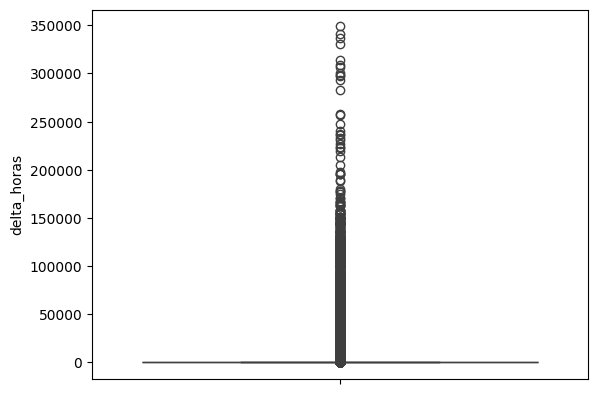

In [ ]:
#despliegue de un boxplot posterior a eliminación de registros negativos menores a 24 horas
sns.boxplot(df['delta_horas'])

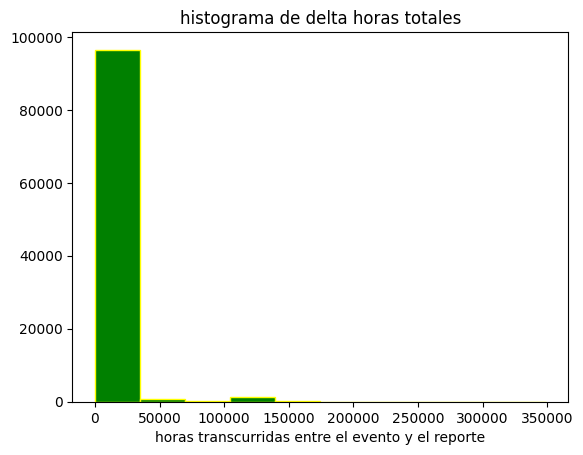

In [ ]:
plt.hist(df['delta_horas'], bins=10, edgecolor="yellow", color="green")
plt.xlabel('horas transcurridas entre el evento y el reporte')
plt.title('histograma de delta horas totales')
plt.show()

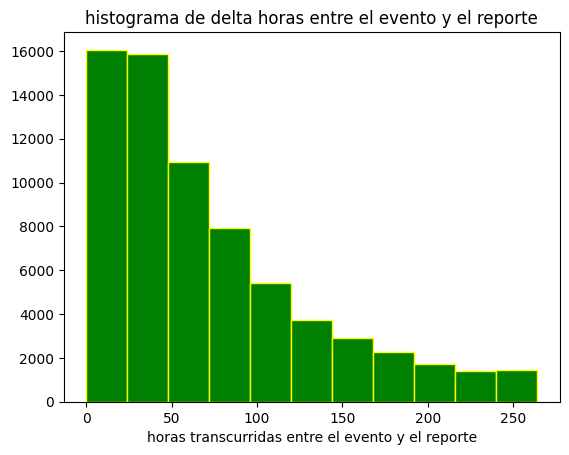

In [ ]:
bins=[0,24,48,72,96,120,144,168,192,216,240,264]
plt.hist(df['delta_horas'], bins=bins, edgecolor="yellow", color="green")
plt.xlabel('horas transcurridas entre el evento y el reporte')
plt.title('histograma de delta horas entre el evento y el reporte')
plt.show()

In [ ]:
filtro_estado_mx= df[df['ESTADO']== 'ESTADO DE MEXICO']

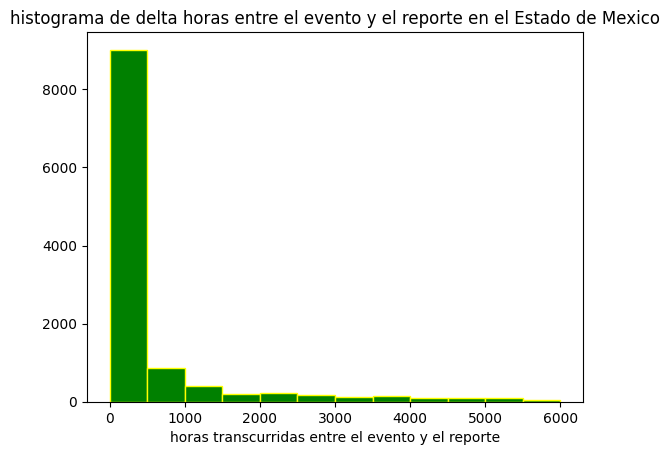

In [ ]:
#bins=[0,24,48,72,96,120,144,168,192,216,240,264]
bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
plt.hist(filtro_estado_mx['delta_horas'], bins=bins, edgecolor="yellow", color="green")
plt.xlabel('horas transcurridas entre el evento y el reporte')
plt.title('histograma de delta horas entre el evento y el reporte en el Estado de Mexico')
plt.show()

In [ ]:
filtro_estado_tx= df[df['ESTADO']== 'TEXAS']
filtro_estado_tx.value_counts()

Series([], Name: count, dtype: int64)

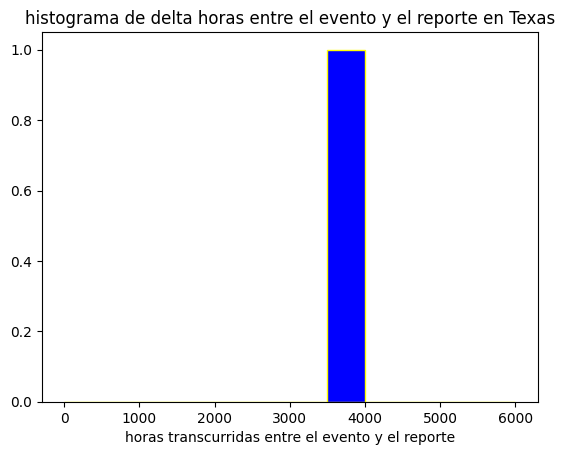

In [ ]:
bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000]
plt.hist(filtro_estado_tx['delta_horas'], bins=bins, edgecolor="yellow", color="blue")
plt.xlabel('horas transcurridas entre el evento y el reporte')
plt.title('histograma de delta horas entre el evento y el reporte en Texas')
plt.show()

La distribución del delta en horas se encuentra sesgado a la izquierda a nivel generaly existen muchos valores que sobrepasan las 1000 horas y distorsionan la distribución. Por tanto se evaluará el comportamiento por estado utilizando la mediana.

Eliminación de dos casos de Texas cuyas horas delta entre el evento y el reporte superan las 3000 horas.

In [ ]:
#para eliminar el conjunto de registros que conforme al dataset corresponden al estado de Texas
df = df.drop(df[df['ESTADO'] == 'TEXAS'].index)

Para obtener la mediana del delta de horas entre el evento y reporte por estado federal

In [ ]:
df['delta_horas'].groupby(df['ESTADO']).median()

ESTADO
AGUASCALIENTES           28.716667
BAJA CALIFORNIA         116.950000
BAJA CALIFORNIA SUR      25.766667
CALIFORNIA                0.516667
CAMPECHE                 30.444306
CHIAPAS                 120.000000
CHIHUAHUA                62.466667
COAHUILA DE ZARAGOZA    266.500000
COLIMA                   50.166667
DISTRITO FEDERAL         65.316806
DURANGO                  53.833333
ESTADO DE MEXICO        122.500000
GEORGIA                   0.000000
GUANAJUATO               48.000000
GUERRERO                 99.300000
HIDALGO                  54.750000
JALISCO                 129.333333
MICHOACAN                75.500000
MORELOS                  69.283333
NAYARIT                  53.583333
NEW YORK                 96.000000
NO ESPECIFICADO          72.000000
NUEVO LEON              434.000000
OAXACA                   67.541667
PUEBLA                   73.866667
QUERETARO               110.300000
QUINTANA ROO             49.050000
SAN LUIS POTOSI          97.100000
SINALOA      

<Axes: title={'center': 'mediana de tiempo delta por Estado Top 20'}, xlabel='ESTADO'>

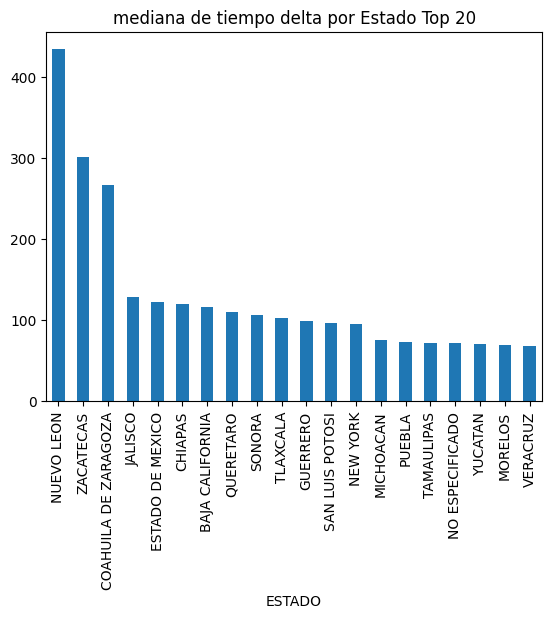

In [ ]:
df['delta_horas'].groupby(df['ESTADO']).median().sort_values(ascending=False).head(20).plot.bar(title='mediana de tiempo delta por Estado Top 20')

Tomando como referencia la mediana del delta en horas entre la fecha del reporte y la del evento, el 40% de los estados(13) supera las 72 horas y el 33% de los estados (10) supera las 100 horas que equivale a 5 días.

**Transformación de fecha de último avistamiento**

Cálculo de tiempo en horas entre fecha de último avistamiento y fecha de evento

In [ ]:
df['delta_avistamiento']=df['fecha_hora_avistamiento']-df['fecha_hora_evento']
df['delta_avistamiento'].head(10)

0   730 days 00:00:00
1     0 days 00:00:00
2     0 days 00:00:00
3     0 days 01:00:00
4    56 days 00:45:00
5     0 days 00:00:00
6     0 days 02:47:00
7     0 days 00:00:00
8     0 days 00:17:00
9   366 days 00:00:00
Name: delta_avistamiento, dtype: timedelta64[ns]

In [ ]:
print(df['delta_avistamiento'].dtypes)

timedelta64[ns]


In [ ]:
#para convertir el delta del tiempo a segundos
df['delta_s_avistamiento'] = df['delta_avistamiento'].dt.total_seconds()

df['delta_s_avistamiento'].head()

0    63072000.0
1           0.0
2           0.0
3        3600.0
4     4841100.0
Name: delta_s_avistamiento, dtype: float64

In [ ]:
#para convertir el delta del tiempo en segundos a horas
df['delta_horas_avistamiento']=round(df['delta_s_avistamiento']/3600)
df['delta_horas_avistamiento'].head(10)

0    17520.0
1        0.0
2        0.0
3        1.0
4     1345.0
5        0.0
6        3.0
7        0.0
8        0.0
9     8784.0
Name: delta_horas_avistamiento, dtype: float64

In [ ]:
df['delta_horas_avistamiento'].groupby(df['ESTADO']).mean()

ESTADO
AGUASCALIENTES             -3.460075
BAJA CALIFORNIA         35079.702952
BAJA CALIFORNIA SUR       614.816667
CALIFORNIA                  0.000000
CAMPECHE                 3595.494898
CHIAPAS                  -226.728571
CHIHUAHUA                -149.360014
COAHUILA DE ZARAGOZA     1338.243231
COLIMA                    281.823337
DISTRITO FEDERAL         2267.896443
DURANGO                   290.070922
ESTADO DE MEXICO          168.079298
GEORGIA                    11.000000
GUANAJUATO                230.089210
GUERRERO                  176.100040
HIDALGO                  2856.691620
JALISCO                   -75.638871
MICHOACAN                 145.863808
MORELOS                  1726.985348
NAYARIT                  9455.950617
NEW YORK                    1.000000
NO ESPECIFICADO          4034.405797
NUEVO LEON                 93.606529
OAXACA                    443.961353
PUEBLA                     10.943656
QUERETARO                -270.395133
QUINTANA ROO             -378.3

Creación de un box plot sobre el delta de horas entre el tiempo de último avistamiento vs el tiempo del evento

<Axes: ylabel='delta_horas_avistamiento'>

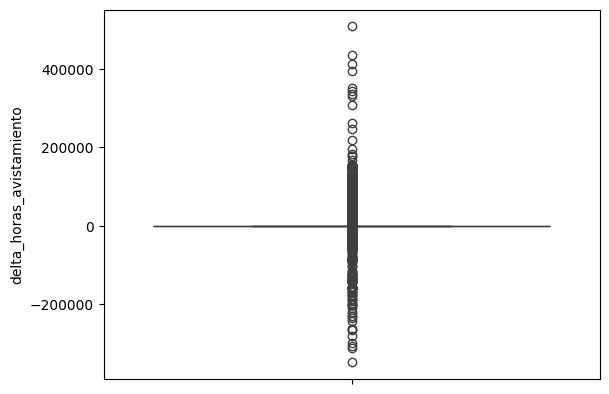

In [ ]:
sns.boxplot(df['delta_horas_avistamiento'])

Conforme al boxplot existe una porción importante de casos de personas que fueron vistas con anterioridad a la fecha del evento

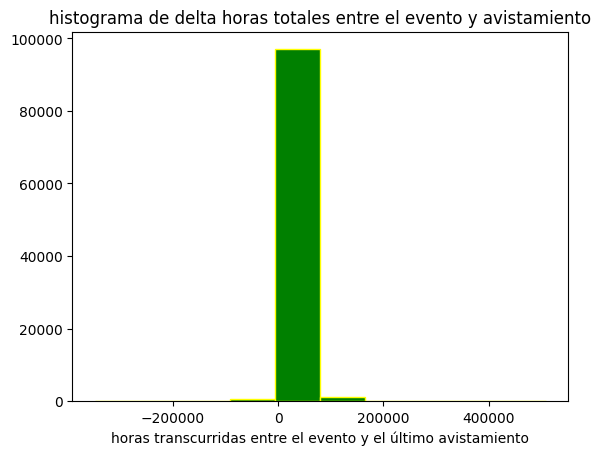

In [ ]:
plt.hist(df['delta_horas_avistamiento'], bins=10, edgecolor="yellow", color="green")
plt.xlabel('horas transcurridas entre el evento y el último avistamiento')
plt.title('histograma de delta horas totales entre el evento y avistamiento')
plt.show()

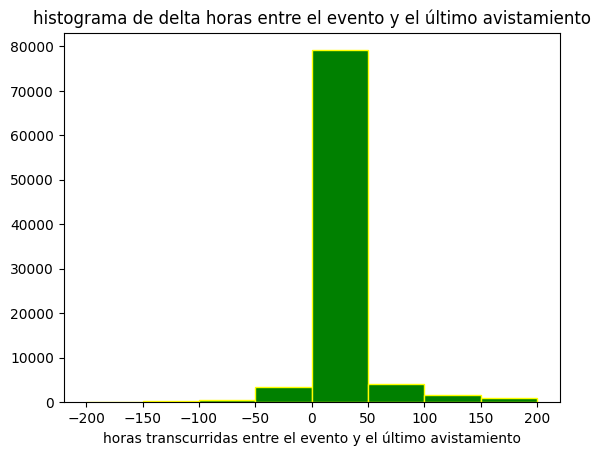

In [ ]:
bins_avistamiento=[-200,-150,-100,-50,0,50,100,150,200]
plt.hist(df['delta_horas_avistamiento'], bins=bins_avistamiento, edgecolor="yellow", color="green")
plt.xlabel('horas transcurridas entre el evento y el último avistamiento')
plt.title('histograma de delta horas entre el evento y el último avistamiento')
plt.show()

<Axes: title={'center': 'promedio de delta de tiempo de último avistamiento por Estado Top 30'}, xlabel='ESTADO'>

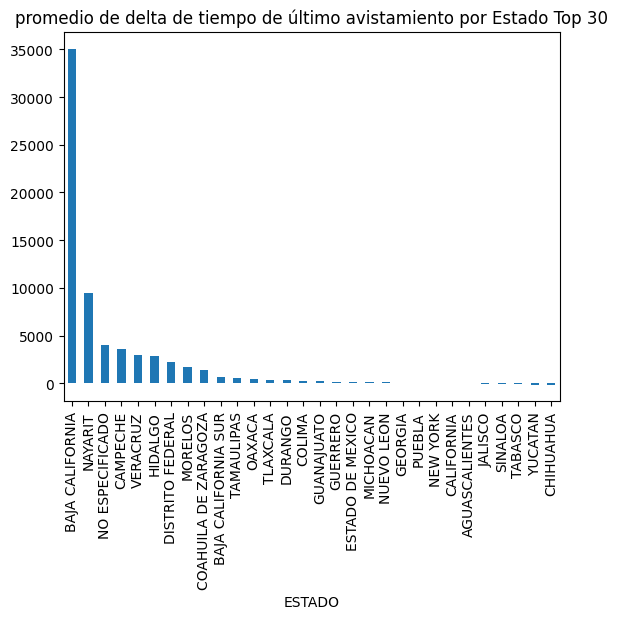

In [ ]:
df['delta_horas_avistamiento'].groupby(df['ESTADO']).mean().sort_values(ascending=False).head(30).plot.bar(title='promedio de delta de tiempo de último avistamiento por Estado Top 30')

Transformación de la variable Nacionalidad

In [ ]:
#para contar el número de registros de ciudadanos locales
count_nacionales=df.loc[df['NACIONALIDAD']=='MEXICANA','NACIONALIDAD'].value_counts()
count_nacionales

NACIONALIDAD
MEXICANA    88360
Name: count, dtype: int64

In [ ]:
#Creación de atributo de "nacional". Si la persona es mexicana, el valor que toma es cero, caso contrario toma el valor 1
df['NACIONAL'] = np.where(
    df['NACIONALIDAD'] == 'MEXICANA', 0, 1)

In [ ]:
df['NACIONAL'].head()

0    0
1    0
2    0
3    0
4    0
Name: NACIONAL, dtype: int64

Transformación de la variable sexo

In [ ]:
#Creación de atributo de "genero". Si la persona es de género masculino, el valor que toma es cero, caso contrario toma el valor 1
df['GENERO'] = np.where(
    df['SEXO'] == 'MASCULINO', 0, 1)

In [ ]:
df['GENERO'].head()

0    1
1    1
2    0
3    1
4    1
Name: GENERO, dtype: int64

Transformación de la variable "Contaba con aparatos de Comunicación"

In [ ]:
#para contar el número de registros de ciudadanos que contaban con artefactos de comunicación a la fecha del evento
count_con_aparatos=df.loc[df['CONTABA CON APARATOS DE COMUNICACIÓN']=='SI','CONTABA CON APARATOS DE COMUNICACIÓN'].value_counts()
count_con_aparatos

CONTABA CON APARATOS DE COMUNICACIÓN
SI    5336
Name: count, dtype: int64

In [ ]:
#Creación de atributo "APARATOS". Si la persona no llevaba consigo artefactos de comunicación, el valor que toma es cero, caso contrario toma el valor 1
df['APARATOS'] = np.where(
    df['CONTABA CON APARATOS DE COMUNICACIÓN'] == 'NO', 0, 1)

In [ ]:
df['APARATOS'].head()

0    1
1    1
2    0
3    0
4    0
Name: APARATOS, dtype: int64

Transformación de las variables Estado

Creación del atributo de "Cambio Estado". Si el estado donde la persona fue localizada es el mismo que el reportado en el evento o si fue encontrado Vivo, toma un valor de cero, en base al paper de Quinto y Huerta(2023). Si el Estado'Localizado' es'NO ESPECIFICADO' o su valor es 'nan', toma el valor de 2, y los restantes que corresponden a un estado localizado diferente al reportado tomando el valor de 1.

In [ ]:
#Creación de atributo de "Cambio Estado". Si el estado donde la persona fue localizada es el mismo que el evento toma un valor de cero, caso contrario toma el valor 1
df['CAMBIO ESTADO'] = np.where(df['ESTADO'] == df['ESTADO (LOCALIZADO)'],0,
    np.where(df['VIVO O MUERTO']=='VIVO',0,
    np.where(df['ESTADO (LOCALIZADO)']=='NO ESPECIFICADO',2,
    np.where(df['ESTADO (LOCALIZADO)']=='AUN SIN LOCALIZAR',2,1))))


In [ ]:
df['CAMBIO ESTADO'].head()

0    2
1    0
2    0
3    0
4    0
Name: CAMBIO ESTADO, dtype: int64

Conteo de personas que no cambiaron de estado

In [ ]:
df['CAMBIO_ESTADO_0']=df['CAMBIO ESTADO']==0
df['CAMBIO_ESTADO_0'].value_counts()#para contar las personas que fueron encontradas en el mismo estado donde se reportó su desparición

CAMBIO_ESTADO_0
True     61723
False    37312
Name: count, dtype: int64

In [ ]:
df['CAMBIO_ESTADO_1']=df['CAMBIO ESTADO']==1
df['CAMBIO_ESTADO_1'].value_counts()#para contar las personas que cambiaron de estado cuando fueron halladas

CAMBIO_ESTADO_1
False    98766
True       269
Name: count, dtype: int64

In [ ]:
df['CAMBIO_ESTADO_2']=df['CAMBIO ESTADO']==2
df['CAMBIO_ESTADO_2'].value_counts()#para contar las personas donde no se especifica en qué estado fueron encontradas o aún no han sido localizadas

CAMBIO_ESTADO_2
False    61992
True     37043
Name: count, dtype: int64

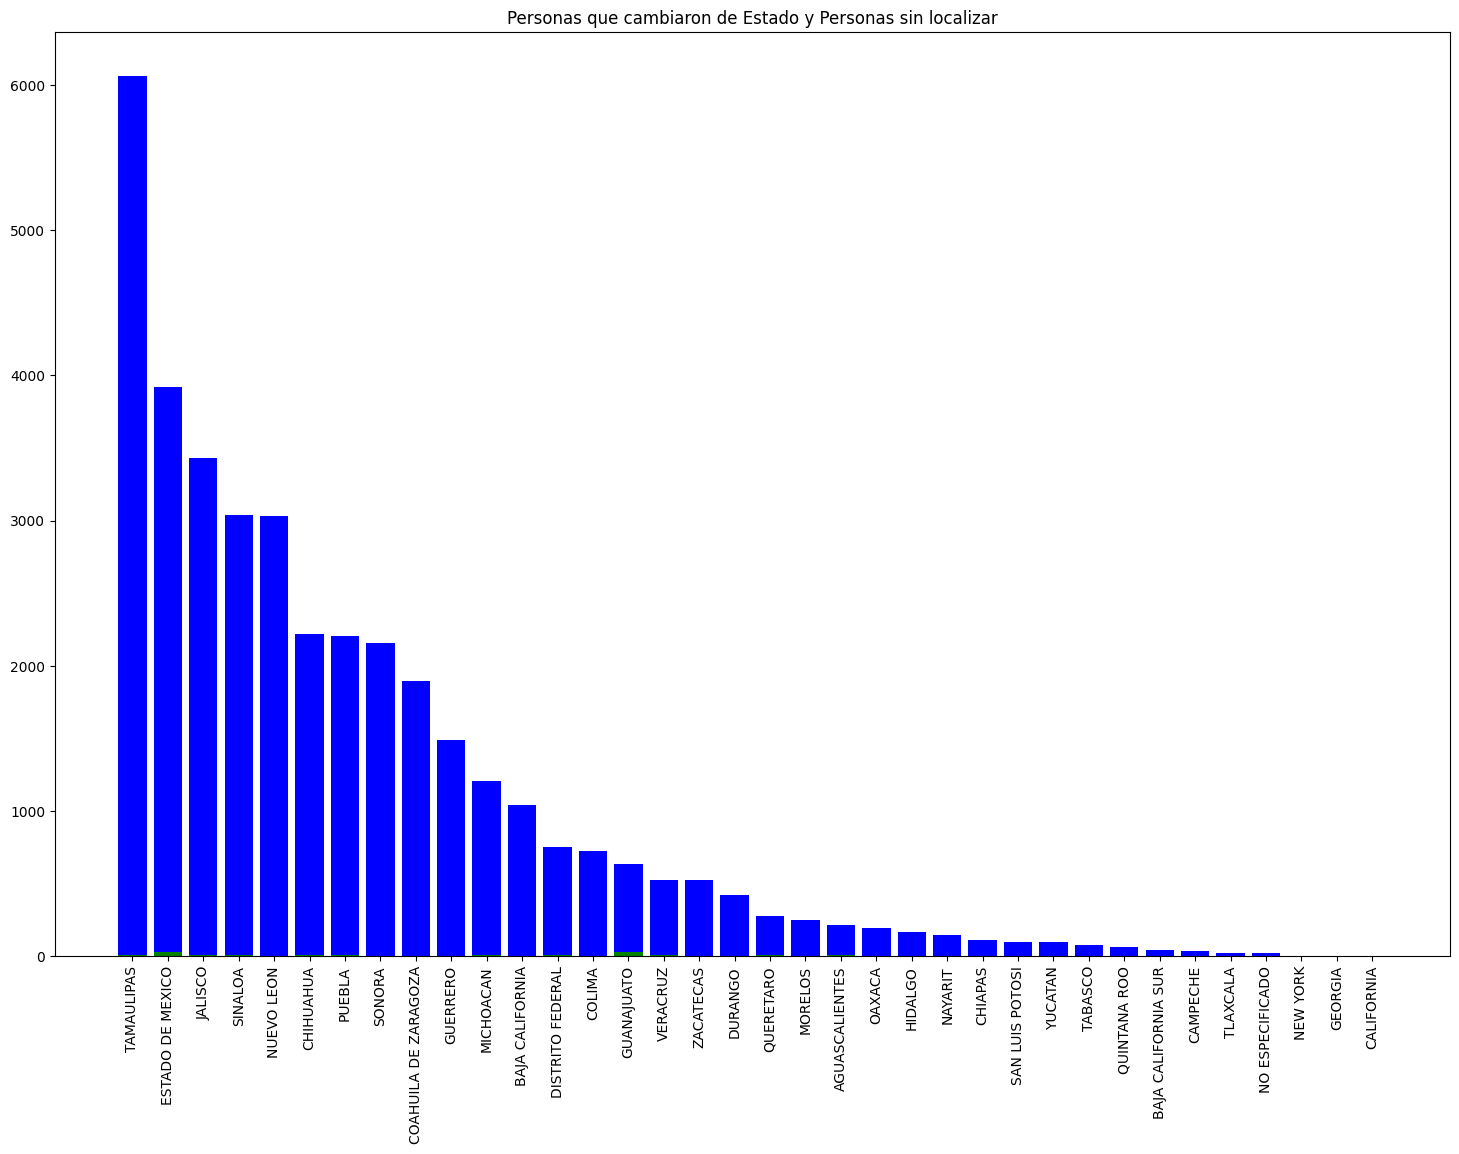

In [ ]:
# para visualizar el total de personas no localizadas + las que cambiaron de estado federativo

df['NO_ESPECIFICADAS_NO_LOCALIZADAS']=df['CAMBIO ESTADO'].where(df['CAMBIO ESTADO']==2)
df['CAMBIO ESTADO LOCALIZADO']=df['CAMBIO ESTADO'].where(df['CAMBIO ESTADO']==1)
df_cambio_estado_status=df[['ESTADO','NO_ESPECIFICADAS_NO_LOCALIZADAS','CAMBIO ESTADO LOCALIZADO']]
df_cambio_estado_status.head()
df_cambio_estado_agrupado=df_cambio_estado_status.groupby('ESTADO')[['CAMBIO ESTADO LOCALIZADO','NO_ESPECIFICADAS_NO_LOCALIZADAS']].count().reset_index().sort_values(by=['NO_ESPECIFICADAS_NO_LOCALIZADAS'], ascending=False)

plt.figure(figsize=(18, 12))
plt.bar(df_cambio_estado_agrupado['ESTADO'], df_cambio_estado_agrupado['NO_ESPECIFICADAS_NO_LOCALIZADAS'],color='blue', label='No_Especificada_No_localizadas')
plt.bar(df_cambio_estado_agrupado['ESTADO'], df_cambio_estado_agrupado['CAMBIO ESTADO LOCALIZADO'],color='green', label='Cambio Estado y localizado')
plt.title('Personas que cambiaron de Estado y Personas sin localizar')
plt.xticks(rotation='vertical')

plt.show()

Los estados que mayormente reportan personas no localizadas o no se especifican el estado donde fueron finalmente ubicadas corresponden a Tamaulipas, Estado de Méxco, Jalisco, Sinaloa y Nuevo León. El número de personas que cambiaron de estado es  marginal y se ubican en los estados de México y Guanajuato.

Regionalización de la variable 'Estado'

In [ ]:
#creación de un diccionario de regiones
#https://www.researchgate.net/figure/Figura-1-Mapa-de-la-republica-mexicana-que-muestra-la-division-en-8-zonas-geograficas-y_fig1_362751163
regiones={
    'noroeste':('BAJA CALIFORNIA','BAJA CALIFORNIA SUR','SONORA','SINALOA','NAYARIT'),
    'norte':('CHIHUAHUA','COAHUILA DE ZARAGOZA','DURANGO','ZACATECAS','SAN LUIS POTOSI'),
    'noreste':('NUEVO LEON','TAMAULIPAS'),
    'occidente':('AGUASCALIENTES','JALISCO','COLIMA','MICHOACAN','GUANAJUATO'),
    'centro':('QUERETARO','HIDALGO','ESTADO DE MEXICO','DISTRITO FEDERAL','MORELOS','PUEBLA','TLAXCALA'),
    'oriente':('VERACRUZ','TABASCO'),
    'sur':('GUERRERO','OAXACA','CHIAPAS'),
    'yucatan':('YUCATAN','CAMPECHE','QUINTANA ROO')
    }

In [ ]:
#definición de función para encontrar la clave del diccionario en los valores de la columna('ESTADO)
def encontrar_clave(v):
  buscado= False
  for k in regiones.keys():
    if v in regiones[k]:
      return k
  if not buscado: return None

In [ ]:
#creación de una nueva columna basado en la región a la que pertenece el 'ESTADO'
df['region'] = df['ESTADO'].apply(encontrar_clave)

In [ ]:
df['region'].head()

0       centro
1    occidente
2       centro
3    occidente
4    occidente
Name: region, dtype: object

In [ ]:
regiones_nan_count= df['region'].isna().sum()
regiones_nan_count

263

In [ ]:
#eliminación de los registros que contienen estados u otros valores que no son estados federales
df = df.dropna(subset=['region'])
region_blanks=df['region'].isna().sum()
region_blanks

0

In [ ]:
regiones=df['region'].unique()
regiones#para verificar que todos los registros incluyan la región según el estado al que pertenecen

array(['centro', 'occidente', 'norte', 'noreste', 'noroeste', 'sur',
       'yucatan', 'oriente'], dtype=object)

In [ ]:
#Definición de una función para convertir la región en una variable categórica ordinal (dirección norte-sur)
def volver_ordinal(region):
  if region == 'noroeste':
    return 0
  elif region == 'norte':
    return 1
  elif region == 'noreste':
    return 2
  elif region == 'occidente':
    return 3
  elif region == 'centro':
    return 4
  elif region == 'oriente':
    return 5
  elif region == 'sur':
    return 6
  elif region == 'yucatan':
    return 7
  else:
    return 8


<ipython-input-138-439298b987e9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

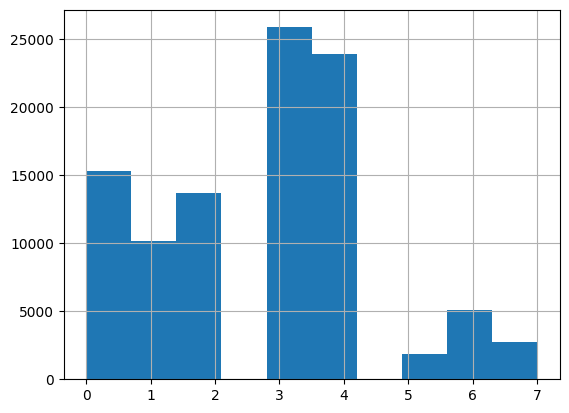

In [ ]:
#para crear una variable 'region_ordinal' según la región geográfica a la que pertenece el estado federal
df['region_ordinal']=df['region'].map(lambda region: volver_ordinal(region))
#para visualizar el histograma de los casos por regiones
df['region_ordinal'].hist()

De acuerdo con el histograma los casos de desaparecidos se encuentran concentados en las regiones Occidente y Centro (superando el 50% de casos)

Transformación de la variable 'Relación con grupos delictivos'.

In [ ]:
#Si la persona no tiene relación con grupos delictivos toma el valor de cero, caso contrario toma el valor de 1
df['DELICTIVO'] = np.where(
    df['RELACIÓN CON GRUPOS DELICTIVOS'] == 'NO', 0, 1)

In [ ]:
df['DELICTIVO'].head()

0    0
1    0
2    0
3    0
4    0
Name: DELICTIVO, dtype: int64

# Definición de la variable target y características predictivas

In [ ]:
df['VIVO O MUERTO'].unique()

array(['AUN SIN LOCALIZAR', 'VIVO', 'MUERTO'], dtype=object)

In [ ]:
#para contar el numero de registros con valor vacío ("VIVO O MUERTO") en el dataframe
estado_aparicion_nulls=df['VIVO O MUERTO'].isnull().sum()
estado_aparicion_nulls

0

In [ ]:
#indices = list(np.where(df['VIVO O MUERTO'].isna()[0]))
nan_idx = np.where(df['VIVO O MUERTO'].isnull())[0]
nan_idx

array([], dtype=int64)

In [ ]:
#para eliminar los registros de los valores Null de la variable target
df = df.dropna(subset=['VIVO O MUERTO'])
vivo_muerto_blanks=df['VIVO O MUERTO'].isna().sum()
vivo_muerto_blanks

0

<Axes: >

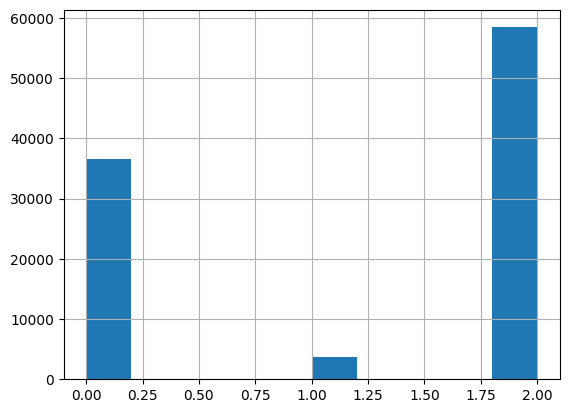

In [ ]:
#Definición  de una función para discretizar la variable target convirtiéndola en una ordinal
def discretizar(categoria):
  if categoria == 'AUN SIN LOCALIZAR':
    return 0
  elif categoria == 'MUERTO':
    return 1
  elif categoria == 'VIVO':
    return 2

df['status_ordinal'] = df['VIVO O MUERTO'].map(lambda categoria: discretizar(categoria))
df['status_ordinal'].hist()

<Axes: >

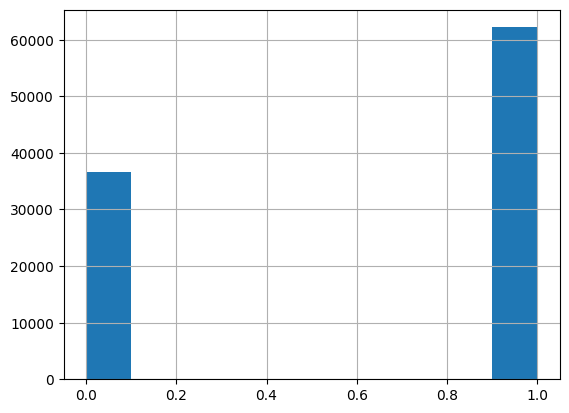

In [ ]:
#Definición  de una función para discretizar la variable target convirtiéndola en una categórica binaria
def discretizar_binar(categoria):
  if categoria == 'AUN SIN LOCALIZAR':
    return 0
  else: return 1

df['status_binar'] = df['VIVO O MUERTO'].map(lambda categoria: discretizar_binar(categoria))
df['status_binar'].hist()

In [ ]:
#Definición de dataframe para fines de modelización
mode_df=df[['NACIONAL','GENERO','EDAD','APARATOS','DELICTIVO','delta_horas','delta_horas_avistamiento','CAMBIO ESTADO','region_ordinal','status_binar']]

In [ ]:
mode_df.head(5)

,NACIONAL,GENERO,EDAD,APARATOS,DELICTIVO,delta_horas,delta_horas_avistamiento,CAMBIO ESTADO,region_ordinal,status_binar
0,0,1,13.0,1,0,23408.000000,17520.0,2,4,0
1,0,1,18.0,1,0,142.000000,0.0,0,3,1
2,0,0,24.0,0,0,50.333333,0.0,0,4,1
3,0,1,15.0,0,0,456.683333,1.0,0,3,1
4,0,1,26.0,0,0,24.750000,1345.0,0,3,1


In [ ]:
mode_df.shape

(98772, 10)

Estadísticos básicos de variables predictoras candidatas y la variable objetivo status de desaparición

In [ ]:
mode_df.describe()

,NACIONAL,GENERO,EDAD,APARATOS,DELICTIVO,delta_horas,delta_horas_avistamiento,CAMBIO ESTADO,region_ordinal,status_binar
count,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000,98772.000000
mean,0.106802,0.435994,25.446118,0.054013,0.012190,3292.926065,1629.858411,0.751063,2.736950,0.629642
std,0.308862,0.495889,16.250527,0.226045,0.109733,16213.377175,15576.972996,0.967772,1.762559,0.482903
min,0.000000,0.000000,0.000000,0.000000,0.000000,-24.000000,-348000.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,15.000000,0.000000,0.000000,24.416667,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,21.000000,0.000000,0.000000,73.596667,0.000000,0.000000,3.000000,1.000000
75%,0.000000,1.000000,34.000000,0.000000,0.000000,289.000000,1.000000,2.000000,4.000000,1.000000
max,1.000000,1.000000,90.000000,1.000000,1.000000,348936.300000,508416.000000,2.000000,7.000000,1.000000


Exploración del dataframe

In [ ]:
plt.rcdefaults()

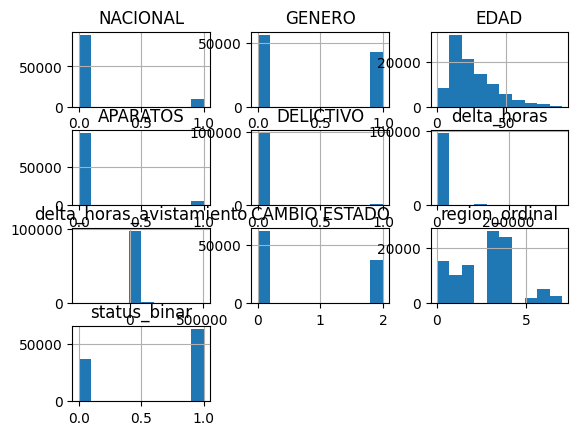

<Figure size 3000x2000 with 0 Axes>

In [ ]:
#creación de programas univariantes
mode_df.hist()
plt.figure(figsize=(30,20))
plt.show()

En los histogamas se puede apreciar que en las variables cuantitativas las distribuciones del delta de horas entre el reporte y el evento muestra una distribución con asimetría posittiva mientras al igual que el delta de horas entre el avistamiento.

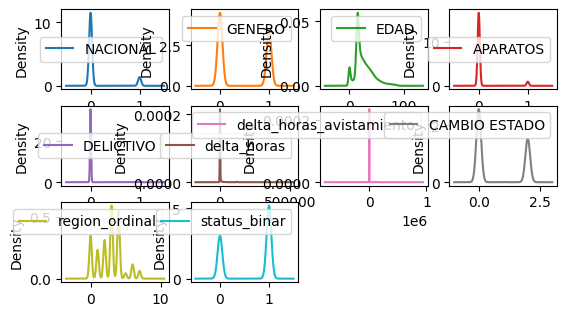

In [ ]:
#gráficos de densidad
mode_df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

En los gráficos de densidad se corrobora algunas características ya descritas en el análisis exploratorio donde por ejemplo tiene mayor predominancia el género masculino, la mayoría delas personas son de origen nacional, no utiliza aparatos, no estuvieron vinculados a grupos delictivos, las regiones donde se concentran los casos corresponden alos del centro del país.

Aplicación de un gráfico de dispersión para detectar posibles relaciones con alguna estructura

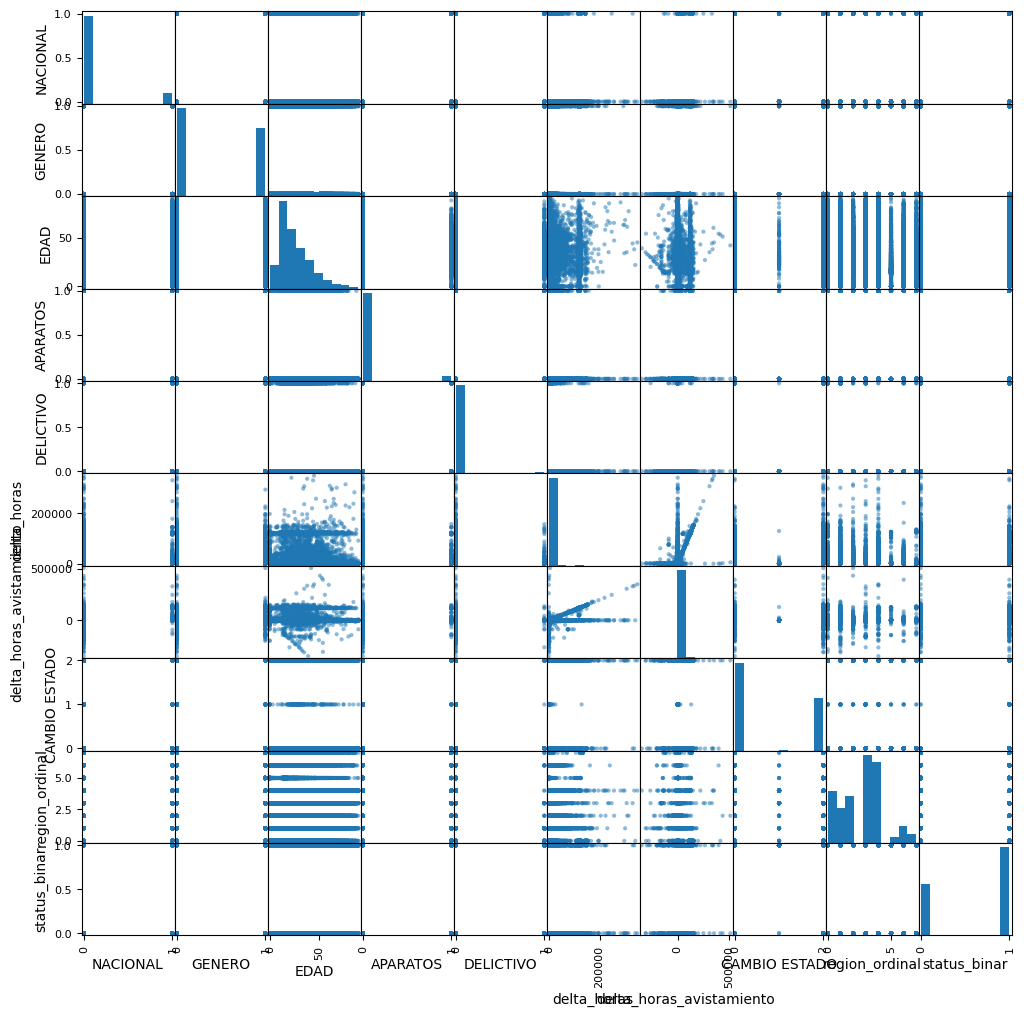

In [ ]:
#Scatterplot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(mode_df, alpha=0.5, figsize=(12,12))

plt.show()

En los diagramas de disperión no se percibe aparentemente exista alguna relación estructurada sobre todo respecto a las variables cuantitativas

Preparación de un gráfico de barras de correlaciones usando el coeficiente de correlación de Pearson

<ipython-input-155-f6874813524f>:1: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



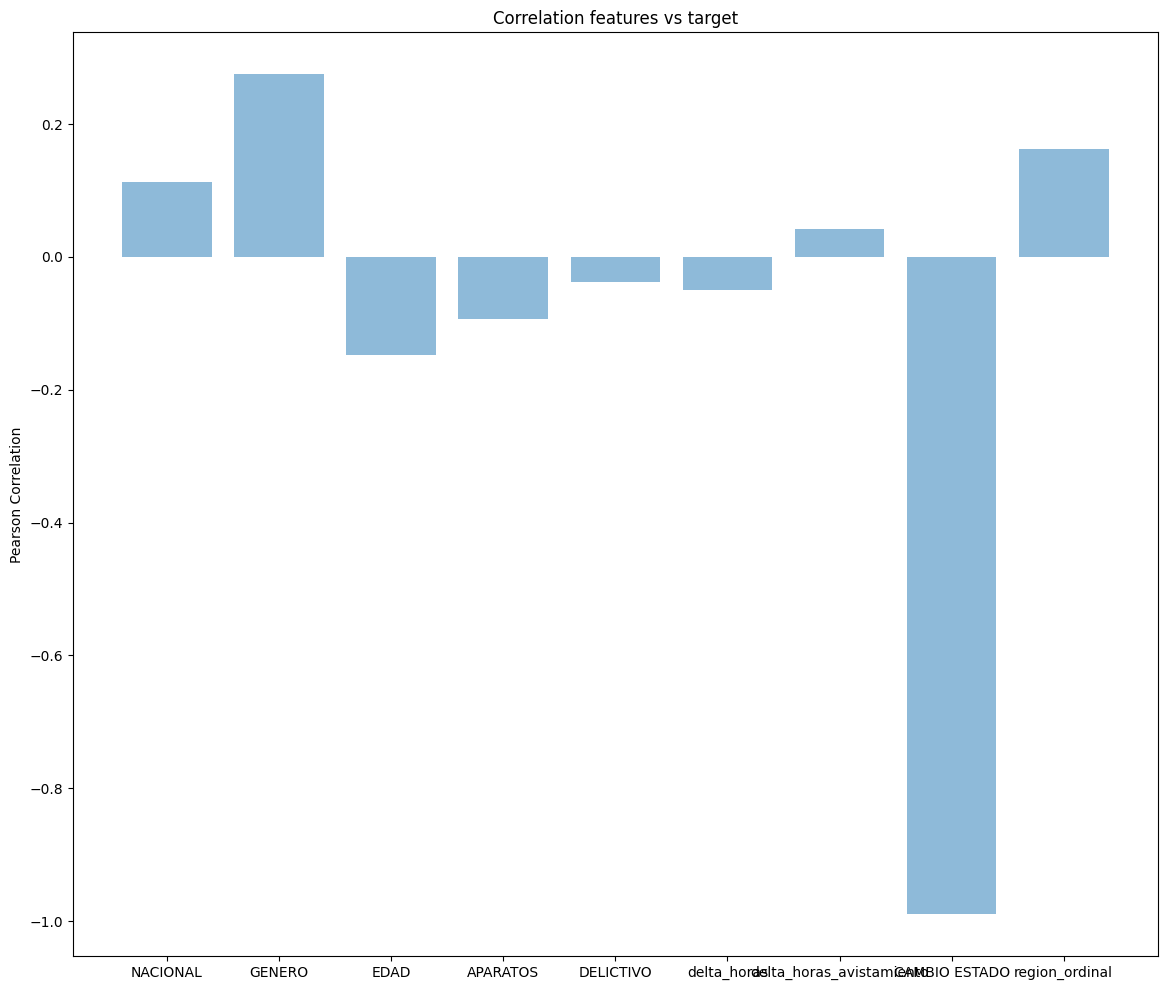

[0.11247182341751996,
 0.27477633476497576,
 -0.1472826614999886,
 -0.09434011652446879,
 -0.03727417739108896,
 -0.04939545334578476,
 0.042054540555944986,
 -0.9892490258167406,
 0.16237195239041707]

In [ ]:
from scipy.stats.stats import pearsonr
corr = [pearsonr(mode_df['NACIONAL'], mode_df['status_binar'])[0],
        pearsonr(mode_df['GENERO'], mode_df['status_binar'])[0],
        pearsonr(mode_df['EDAD'], mode_df['status_binar'])[0],
        pearsonr(mode_df['APARATOS'], mode_df['status_binar'])[0],
        pearsonr(mode_df['DELICTIVO'], mode_df['status_binar'])[0],
        pearsonr(mode_df['delta_horas'], mode_df['status_binar'])[0],
        pearsonr(mode_df['delta_horas_avistamiento'], mode_df['status_binar'])[0],
        pearsonr(mode_df['CAMBIO ESTADO'], mode_df['status_binar'])[0],
        pearsonr(mode_df['region_ordinal'],mode_df['status_binar'])[0]]

features= ('NACIONAL', 'GENERO', 'EDAD','APARATOS','DELICTIVO','delta_horas','delta_horas_avistamiento','CAMBIO ESTADO','region_ordinal')
y_pos = np.arange(len(features))

plt.figure(figsize=(14, 12))
plt.bar(y_pos, corr, align='center', alpha=0.5)
plt.xticks(y_pos, features)
plt.ylabel('Pearson Correlation')
plt.title('Correlation features vs target')

plt.show()

corr

De acuerdo con el coeficiente de Pearson las variables de género y el cambio a otro estado de la nación son los más correlacionados con el objetivo a pesar que éstas representan variables binarias.

Text(0.5, 1.0, 'Matriz de correlaciones')

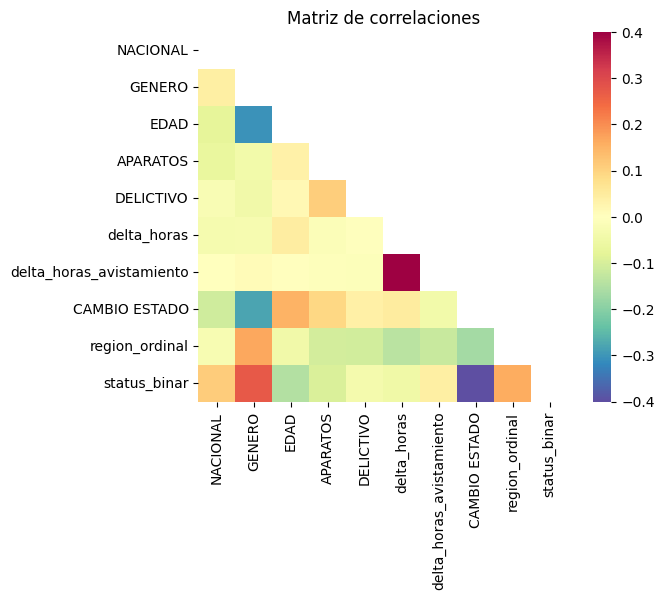

In [ ]:
correl = mode_df.corr()
mask = np.zeros_like(correl)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correl, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Matriz de correlaciones')

https://raphaelvallat.com/correlation.html

Conforme a esta matriz de correlaciones los atributos de más alTa correlación con el status de las personas son el género y si se produjo el cambio de estado.
Esto significaría que las personas de género femenino tienen más posibilidad de ser encontradas.

De acuerdo con la Matriz de correlaciones en términos de Pearson no existen correlaciones altas entre variables predictoras candidatas, lo que haría presumir una menor posibilidad de existencia de colinealidad.

Considerando que las variables seleccionadas con poder de posibles asociaciones no siguen una distribución normal y la variable de salida no es continua sino mas bien es categórica de tipo ordinal, se considera más apropiado explorar otros tipos de correlaciones, los cuales son explorados utilizando el lenguaje R.

In [ ]:
#conversión de la vista objetivo preliminar a csv para su manipulación en R Studio
mode_df.to_csv('target_view4.csv', encoding='utf-8')

A continuación se muestran los resultados de aplicar las correlaciones de las variables categóricas con la variable e salida( ordinal) calcuadas en R Studio

In [ ]:
coefic_corr_polychoric ={'Variables Categóricas':['NACIONAL','APARATOS','DELICTIVO','GENERO','CAMBIO ESTADO','region_ordinal'],
                         'VARIABLE OBJETIVO':['status_binar','status_binar','status_binar','status_binar','status_binar','status_binar'],
                         'correlac_polychoric':[0.2566, -0.2370, -0.1586, -0.4354, -0.9999, 0.2117],
                         'error_standard':[0.0067,0.0079,0.0136,0.0044,0.00, 0.0040]}

df_policoricas=pd.DataFrame(coefic_corr_polychoric)
df_policoricas

,Variables Categóricas,VARIABLE OBJETIVO,correlac_polychoric,error_standard
0,NACIONAL,status_binar,0.2566,0.0067
1,APARATOS,status_binar,-0.2370,0.0079
2,DELICTIVO,status_binar,-0.1586,0.0136
3,GENERO,status_binar,-0.4354,0.0044
4,CAMBIO ESTADO,status_binar,-0.9999,0.0000
5,region_ordinal,status_binar,0.2117,0.0040


In [ ]:
coefic_corr_poliserial ={'Variables cuantitativas':['EDAD','delta_horas','delta_horas_avistamiento'],
                         'VARIABLE OBJETIVO':['status_binar','status_binar','status_binar'],
                         'correlac_poliserial':[-0.1829, -0.0615, 0.058],
                         'error_standar':[0.0038,0.0039,0.0043]}

df_poliseriales=pd.DataFrame(coefic_corr_poliserial)
df_poliseriales

,Variables cuantitativas,VARIABLE OBJETIVO,correlac_poliserial,error_standar
0,EDAD,status_binar,-0.1829,0.0038
1,delta_horas,status_binar,-0.0615,0.0039
2,delta_horas_avistamiento,status_binar,0.0580,0.0043


# Clustering

A continuación se aplicará un algoritmo de Clustering desde la perspectiva de aprendizaje no supervisado para observar las posibles agrupaciones que existen en la vista minable y ensayar encontrar algún significado semántico

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_clus, X_test_clus= train_test_split(mode_df[['NACIONAL', 'GENERO', 'EDAD','APARATOS','DELICTIVO','delta_horas','delta_horas_avistamiento','CAMBIO ESTADO','region_ordinal']], test_size=0.2, random_state=42)


In [ ]:
#separación del dataset para training y para validación
x_tr_clus, x_val_clus= train_test_split(X_train_clus, test_size=0.1, random_state=42)
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(x_tr_clus.shape)

(71115, 9)


In [ ]:
# Normalización con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_tr_clus_scal = scaler.fit_transform(x_tr_clus)
X_tr_clus_scal

array([[1.        , 0.        , 0.32222222, ..., 0.40634458, 1.        ,
        0.28571429],
       [0.        , 1.        , 0.26666667, ..., 0.40634458, 0.        ,
        0.42857143],
       [0.        , 0.        , 0.24444444, ..., 0.40668087, 0.        ,
        0.42857143],
       ...,
       [0.        , 1.        , 0.17777778, ..., 0.40641114, 0.        ,
        0.42857143],
       [0.        , 0.        , 0.        , ..., 0.40651506, 0.        ,
        0.        ],
       [0.        , 0.        , 0.55555556, ..., 0.40674042, 0.        ,
        0.42857143]])

In [ ]:
#importación de librería cluster
from scipy.cluster.hierarchy import dendrogram, linkage

Se ha escogido el método Average por su eficiencia en separar clusters donde hay ruido como en este caso (este se ha minimizado usando procesamiento previo) y no es tan exigente en uso de RAM como WARD.
La aplicación de este método ha utilizado más de 40 GB de memoria RAM que está dentro de los recursos disponibles.

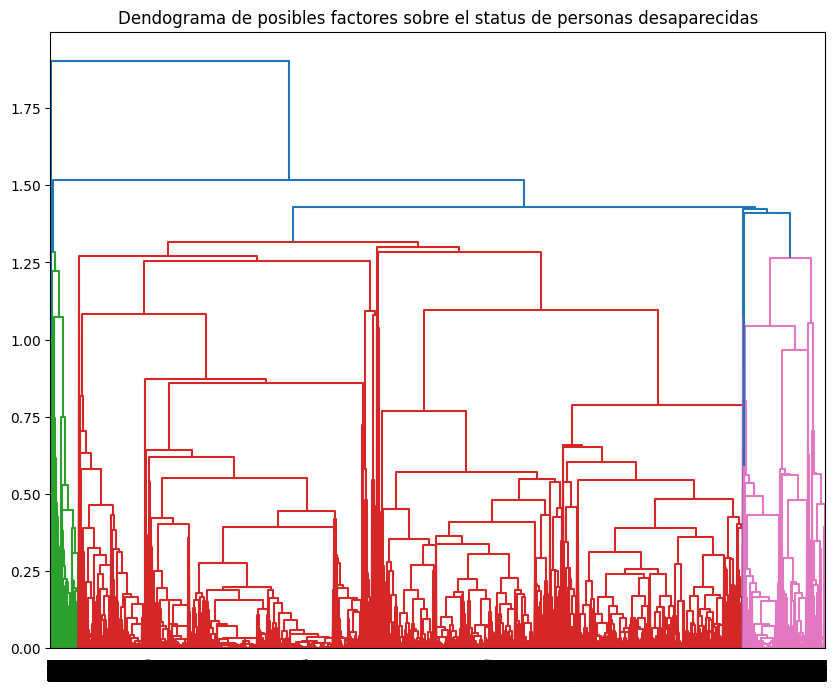

In [ ]:
# ejecución el clustering

plt.figure(figsize=(10, 8))
plt.title("Dendograma de posibles factores sobre el status de personas desaparecidas")
D = linkage(X_tr_clus_scal, method='average')  # average (Método promedio de distancias)
dendograma = dendrogram(D)

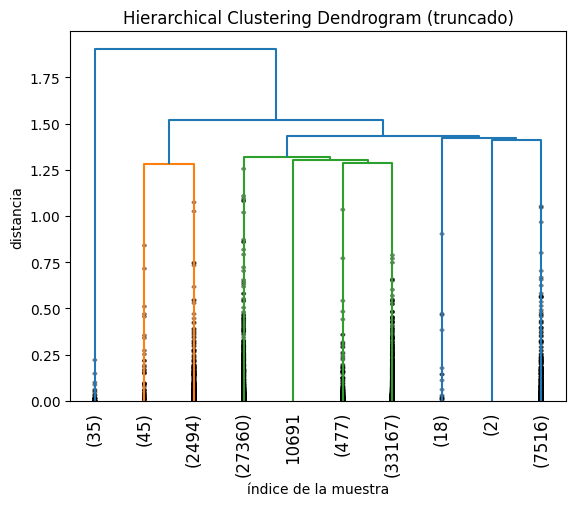

In [ ]:
# quedarnos con las últimas p=10 uniones
plt.title('Hierarchical Clustering Dendrogram (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    D,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=10,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

El racimo central concentra aproximadamente el 86% de los datos. Existe sin embargo, una rama que se ha conformado sin considerar las distancias o alguna medida de similitud específica

# MODELIZACION

Modelización con Árboles de Decisión

Modelización con 2 variables


In [ ]:
#1.1 Model Parametrization
# criterion: gini
# splitter: best/random
# max_depth: low value avoid overfitting
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

In [ ]:
#separación del dataset en training & test
X_train, X_test, y_train, y_test = train_test_split(mode_df[['GENERO','CAMBIO ESTADO']],mode_df['status_binar'], test_size=0.2, random_state=42)


In [ ]:
#separación del dataset para training y para validación
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr.shape)

(71115,)


In [ ]:
#1.2 Model construction
model.fit(x_tr,y_tr)

DecisionTreeClassifier(max_depth=10, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



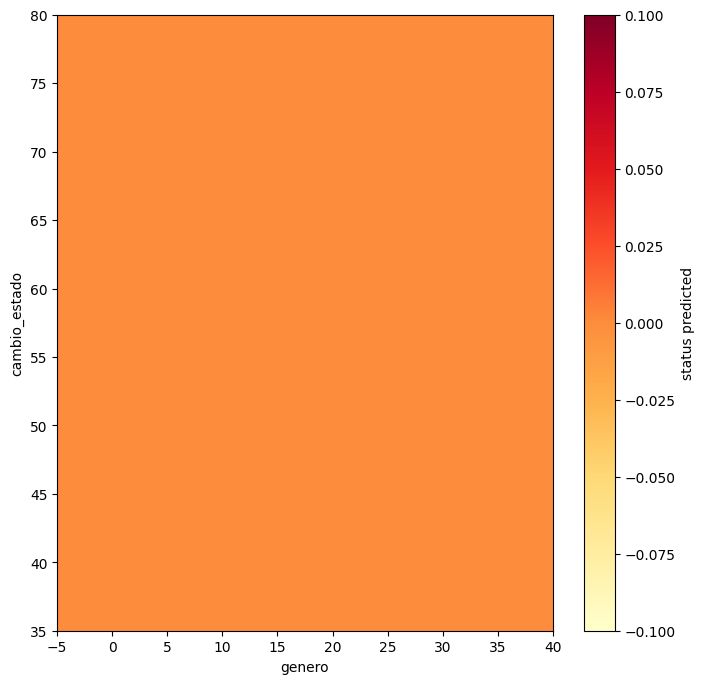

In [ ]:
# Visualización para 2 predictores

nx = 30
ny = 30
# creating a grid of points
x_genero = np.linspace(-5, 40, nx)
y_cambio_estado = np.linspace(35, 80, ny)
xx, yy = np.meshgrid(x_genero, y_cambio_estado)
# evaluating the regresson on all the points
z_status = model.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_status, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_genero, y_cambio_estado, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='status predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(x_tr['GENERO'], x_tr['CAMBIO ESTADO'], s=y_tr*5, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_genero), np.max(x_genero))
plt.ylim(np.min(y_cambio_estado), np.max(y_cambio_estado))
plt.xlabel('genero')
plt.ylabel('cambio_estado')
plt.show()

In [ ]:
# show classification metrics
from sklearn.metrics import classification_report

y_true = y_val
y_pred = model.predict(x_val[['GENERO', 'CAMBIO ESTADO']])
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       1.00      0.99      1.00      5021

    accuracy                           1.00      7902
   macro avg       0.99      1.00      1.00      7902
weighted avg       1.00      1.00      1.00      7902



In [ ]:
# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred)
conf_matrix

array([[2879,    2],
       [  34, 4987]])

El código de la función para generar la matriz de confusión está basado en la clase de Machine Learning VIU Período Septiembre - Diciembre 2023

In [ ]:
#definición de función para generación de la Matriz de Confusión
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if normalize else 'd'
    #thresh = cm.max() / 2.
    #for i in range(cm.shape[0]):
    #    for j in range(cm.shape[1]):
    #        ax.text(j, i, format(cm[i, j],fmt),
    #                ha="center", va="center",
    #                color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[2879    2]
 [  34 4987]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

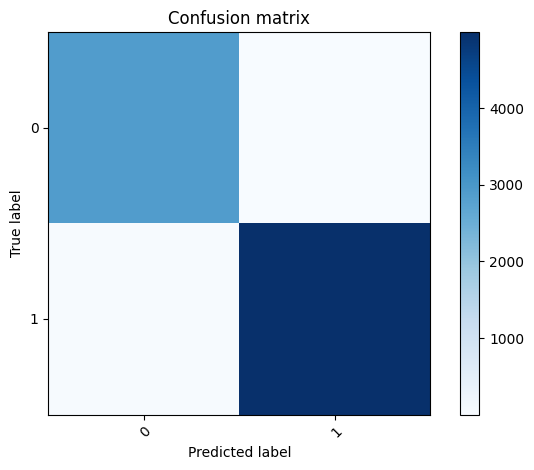

In [ ]:
plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')

**Modelo de árboles de decisión con 3 variables**

In [ ]:
#1.1 Model Parametrization
# criterion: gini
# splitter: best/random
# max_depth: low value avoid overfitting
model1 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

In [ ]:
#separación del dataset en training & test
X_train1, X_test1, y_train1, y_test1 = train_test_split(mode_df[['GENERO','CAMBIO ESTADO','EDAD']],mode_df['status_binar'], test_size=0.2, random_state=42)

Se agrega el atributo 'EDAD' donde los registros para aplicar preprocesamiento fueron pocos y una correlación poliserial negativa de 0.18 aproximadamente.

In [ ]:
#separación del dataset para training y para validación
x_tr1, x_val1, y_tr1, y_val1 = train_test_split(X_train1, y_train1, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr1.shape)

(71115,)


In [ ]:
print(y_val1.shape)

(7902,)


In [ ]:
features1= ('GENERO','CAMBIO ESTADO','EDAD')

In [ ]:
#1.2 Construcción y entrenamiento del modelo
model1.fit(x_tr1, y_tr1)

print ('Feature Relevances')
pd.DataFrame({'Attributes': features1 ,
              'Decision Tree': model1.feature_importances_})

Feature Relevances


,Attributes,Decision Tree
0,GENERO,0.000047
1,CAMBIO ESTADO,0.999762
2,EDAD,0.000192


In [ ]:
# show classification metrics
from sklearn.metrics import classification_report

y_true1 = y_val1
y_pred1= model1.predict(x_val1[['GENERO','CAMBIO ESTADO','EDAD']])
print(classification_report(y_true1, y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       1.00      0.99      1.00      5021

    accuracy                           1.00      7902
   macro avg       0.99      1.00      1.00      7902
weighted avg       1.00      1.00      1.00      7902



Confusion matrix, without normalization
[[2879    2]
 [  34 4987]]


<Axes: title={'center': 'Confusion matrix_3 variables'}, xlabel='Predicted label', ylabel='True label'>

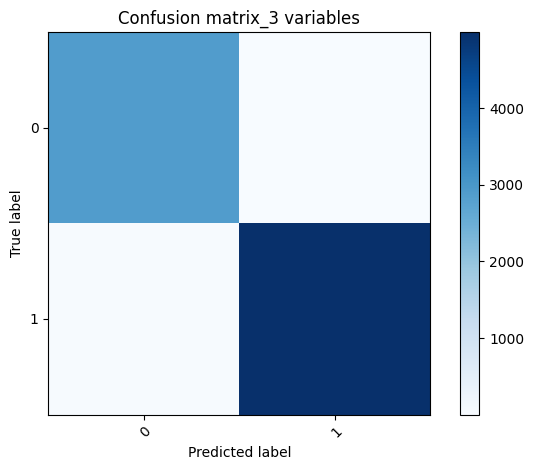

In [ ]:
plot_confusion_matrix(y_true1, y_pred1, normalize=False, classes=model1.classes_, title='Confusion matrix_3 variables')

<function matplotlib.pyplot.show(close=None, block=None)>

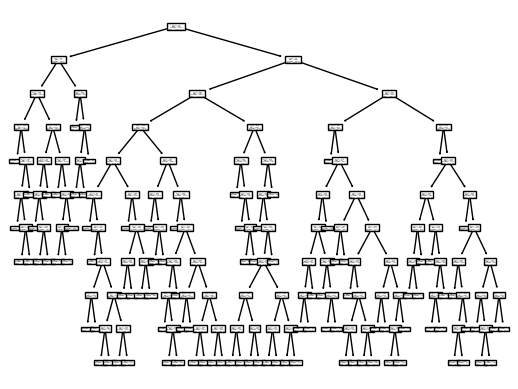

<Figure size 2400x1600 with 0 Axes>

In [ ]:
tree.plot_tree(model1)
plt.figure(figsize=(24, 16))
plt.show

**Modelo de árbol de decisión con variables con 8 variables**

In [ ]:
#1.1 Model Parametrization
# criterion: gini
# splitter: best/random
# max_depth: low value avoid overfitting
model2 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

Se han incluido las características con alta significancia en las correaciones policóricas o poliseriales

In [ ]:
#separación del dataset en training & test
X_train2, X_test2, y_train2, y_test2 = train_test_split(mode_df[['NACIONAL','APARATOS','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr2, x_val2, y_tr2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr2.shape)

(71115,)


In [ ]:
print(y_val2.shape)

(7902,)


In [ ]:
features2= ('NACIONAL','APARATOS','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal')

In [ ]:
#1.2 Construcción y entrenamienteo del modelo
model2.fit(x_tr2, y_tr2)

print ('Feature Relevances')
pd.DataFrame({'Attributes': features2 ,
              'Decision Tree': model2.feature_importances_})

Feature Relevances


,Attributes,Decision Tree
0,NACIONAL,0.000096
1,APARATOS,0.000059
2,GENERO,0.000211
3,CAMBIO ESTADO,0.995314
4,EDAD,0.001131
5,delta_horas,0.001394
6,delta_horas_avistamiento,0.001281
7,region_ordinal,0.000514


In [ ]:
# show classification metrics
from sklearn.metrics import classification_report

y_true2 = y_val2
y_pred2= model2.predict(x_val2[['NACIONAL','APARATOS','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']])
print(classification_report(y_true2, y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       1.00      0.99      1.00      5021

    accuracy                           0.99      7902
   macro avg       0.99      1.00      0.99      7902
weighted avg       0.99      0.99      0.99      7902



Confusion matrix, without normalization
[[2875    6]
 [  35 4986]]


<Axes: title={'center': 'Confusion matrix_8 variables'}, xlabel='Predicted label', ylabel='True label'>

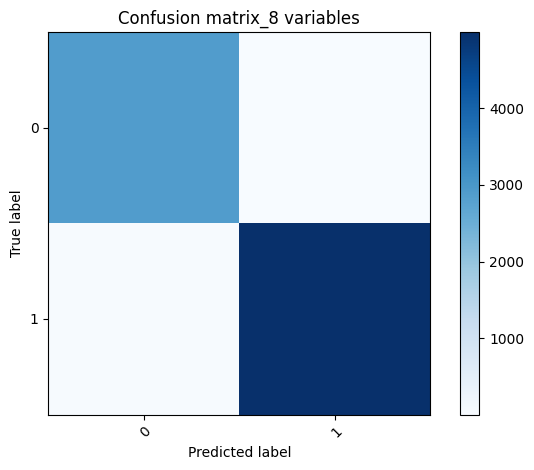

In [ ]:
plot_confusion_matrix(y_true2, y_pred2, normalize=False, classes=model2.classes_, title='Confusion matrix_8 variables')

Árbol de decisión con 4 variables de mayor significancia excluyendo la variable redundante

In [ ]:
#1.1 Model Parametrization
# criterion: gini
# splitter: best/random
# max_depth: low value avoid overfitting
model3 = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)

Se agrega la variable de delta_horas_avistamiento por cuanto en el escenario anterior tiene una similar relevancia que el delta de horas entre el evento y el reporte.

In [ ]:
#separación del dataset en training & test
X_train3, X_test3, y_train3, y_test3 = train_test_split(mode_df[['EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr3, x_val3, y_tr3, y_val3 = train_test_split(X_train3, y_train3, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr3.shape)

(71115,)


In [ ]:
print(y_val3.shape)

(7902,)


In [ ]:
features3= ('EDAD','delta_horas','delta_horas_avistamiento','region_ordinal')

In [ ]:
#1.2 Construcción y entrenamiento del modelo
model3.fit(x_tr3, y_tr3)

print ('Feature Relevances')
pd.DataFrame({'Attributes': features3 ,
              'Decision Tree': model3.feature_importances_})

Feature Relevances


,Attributes,Decision Tree
0,EDAD,0.301941
1,delta_horas,0.227679
2,delta_horas_avistamiento,0.185159
3,region_ordinal,0.285221


In [ ]:
# show classification metrics
from sklearn.metrics import classification_report

y_true3 = y_val3
y_pred3= model3.predict(x_val3[['EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']])
print(classification_report(y_true3, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.53      0.59      2881
           1       0.76      0.85      0.80      5021

    accuracy                           0.73      7902
   macro avg       0.72      0.69      0.70      7902
weighted avg       0.73      0.73      0.73      7902



Confusion matrix, without normalization
[[1516 1365]
 [ 733 4288]]


<Axes: title={'center': 'Confusion matrix_4 variables_excluyendo_la_variable_redundante'}, xlabel='Predicted label', ylabel='True label'>

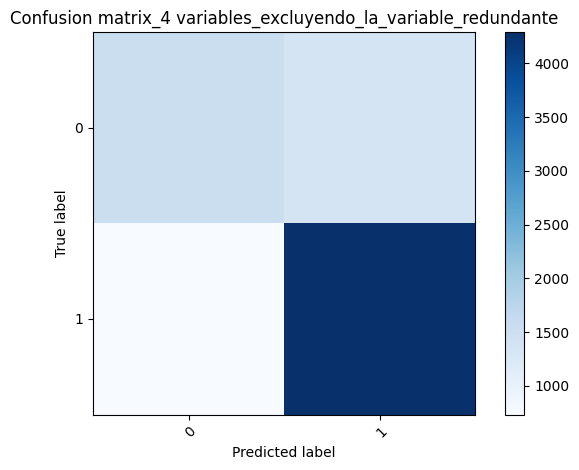

In [ ]:
plot_confusion_matrix(y_true3, y_pred3, normalize=False, classes=model3.classes_, title='Confusion matrix_4 variables_excluyendo_la_variable_redundante')

**Modelización con Support Vector Machine**

Modelización con Support Vector Machine incluyendo como variable target 'status_binar' la variable binaria que acepta 2 valores: 0 Sin localizar 1 Localizado

In [ ]:
from sklearn.svm import SVC#Support vector Classifier"
from sklearn.metrics import accuracy_score

In [ ]:
#separación del dataset en training & test
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(mode_df[['NACIONAL','APARATOS','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_svm, x_val_svm, y_tr_svm, y_val_svm = train_test_split(X_train_svm, y_train_svm, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_svm.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento
from sklearn.preprocessing import StandardScaler

xs_train_svm = StandardScaler().fit_transform(x_tr_svm)

c es el parámetro de penalización del error. Mientras más grande es el hiperparámetro el margen del hiperplano es menor



In [ ]:
#entrenamiento del modelo aplicando un kernel lineal
model_clf_lin = SVC(kernel='linear', C=10)#instancia del modelo clasificador
model_clf_lin.fit(xs_train_svm, y_tr_svm)

SVC(C=10, kernel='linear')

In [ ]:
#esdandarización de los datos de las variables predictoras en validación

xs_val_svm = StandardScaler().fit_transform(x_val_svm)

In [ ]:
#ejecución de la predicción sobre el modelo entrenado
yfit_svm_lin = model_clf_lin.predict(xs_val_svm)

In [ ]:
#evaluación de la performance del modelo
accuracy_svm_lin = accuracy_score(y_val_svm, yfit_svm_lin)
print("Accuracy_svm_lin:", accuracy_svm_lin)

Accuracy_svm_lin: 0.9954441913439636


In [ ]:
#show classificaton metrics
print(classification_report(y_val_svm, yfit_svm_lin))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       1.00      0.99      1.00      5021

    accuracy                           1.00      7902
   macro avg       0.99      1.00      1.00      7902
weighted avg       1.00      1.00      1.00      7902



Matriz de confusión

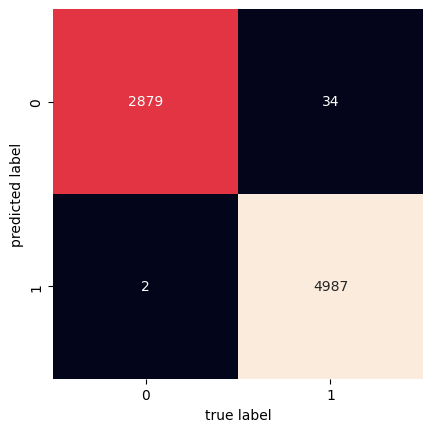

In [ ]:
#from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_val_svm, yfit_svm_lin)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

Aplicación del modelo Support vector Machine usando como variable target una variable categórica ordinal('status_ordinal') que acepta 3 valores: 0 Aun sin localizar, 1: Localizado Muerto  2: Localizado Vivo

In [ ]:
#Definición de dataframe para fines de modelización
mode_df1=df[['NACIONAL','GENERO','EDAD','APARATOS','DELICTIVO','delta_horas','delta_horas_avistamiento','CAMBIO ESTADO','region_ordinal','status_ordinal']]

In [ ]:
#separación del dataset en training & test
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = train_test_split(mode_df1[['NACIONAL','APARATOS','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df1['status_ordinal'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_svm1, x_val_svm1, y_tr_svm1, y_val_svm1 = train_test_split(X_train_svm1, y_train_svm1, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_svm1.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento
#from sklearn.preprocessing import StandardScaler

xs_tr_svm1 = StandardScaler().fit_transform(x_tr_svm1)

In [ ]:
#entrenamiento del modelo aplicando un kernel lineal
model_clf_lin1 = SVC(kernel='linear', C=10)#instancia del modelo clasificador
model_clf_lin1.fit(xs_tr_svm1, y_tr_svm1)

SVC(C=10, kernel='linear')

In [ ]:
#esdandarización de los datos de las variables predictoras en validación

xs_val_svm1 = StandardScaler().fit_transform(x_val_svm1)

In [ ]:
#ejecución de la predicción sobre el modelo entrenado
yfit_svm_lin1 = model_clf_lin1.predict(xs_val_svm1)

In [ ]:
#evaluación de la performance del modelo
accuracy_svm_lin1 = accuracy_score(y_val_svm1, yfit_svm_lin1)
print("Accuracy_svm_lin:", accuracy_svm_lin1)

Accuracy_svm_lin: 0.9655783345988357


In [ ]:
#show classificaton metrics
print(classification_report(y_val_svm1, yfit_svm_lin1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       0.92      0.04      0.08       281
           2       0.95      1.00      0.98      4740

    accuracy                           0.97      7902
   macro avg       0.95      0.68      0.68      7902
weighted avg       0.96      0.97      0.95      7902



Matriz de confusión con SVM utilizando como salida una variable categórica ordinal

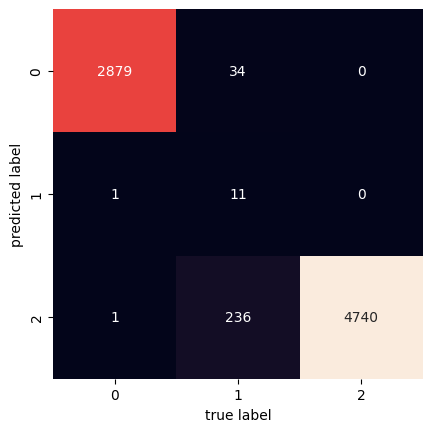

In [ ]:
#from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_val_svm1, yfit_svm_lin1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

Este modelo no demuestra capacidad para predecir la clase 1 que corresponde a los localizados muertos. En este caso según la Matriz de Confusión se predijo existe 11 casos de hallados muertos cuando en realidad fueron 236.

Modelización con SVM usando como variable target la variable categória ordinal(de 3 clases) y como kernel 'rbf' (Radial basis function) usado en datasets no lineales

In [ ]:
#entrenamiento del modelo aplicando un kernel RBF
model_clf_rbf = SVC(kernel='rbf', C=10)#instancia del modelo clasificador
model_clf_rbf.fit(xs_tr_svm1, y_tr_svm1)

SVC(C=10)

In [ ]:
#esdandarización de los datos de las variables predictoras en validación

xs_val_svm_rbf = StandardScaler().fit_transform(x_val_svm1)

In [ ]:
#ejecución de la predicción sobre el modelo entrenado
yfit_svm_rbf = model_clf_rbf.predict(xs_val_svm_rbf)

In [ ]:
#evaluación de la performance del modelo
accuracy_svm_rbf = accuracy_score(y_val_svm1, yfit_svm_rbf)
print("Accuracy_svm_lin:", accuracy_svm_rbf)

Accuracy_svm_lin: 0.9654517843583903


In [ ]:
#show classificaton metrics
print(classification_report(y_val_svm1, yfit_svm_rbf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       0.85      0.04      0.07       281
           2       0.95      1.00      0.98      4740

    accuracy                           0.97      7902
   macro avg       0.93      0.68      0.68      7902
weighted avg       0.96      0.97      0.95      7902



Matriz de confusión con SVM utilizando como salida una variable categórica ordinal y un Kernel 'RBF'

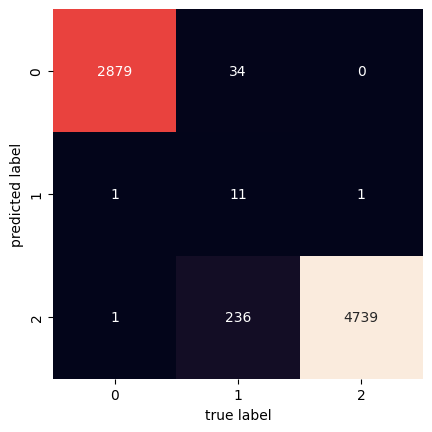

In [ ]:
#from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_val_svm1, yfit_svm_rbf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

Modelización con Support Vector Machine incluyendo como variable target 'status_binar' la variable binaria que acepta 2 valores, un kernel RBF excluyendo la variable predictora de alta redundancia

In [ ]:
#Definición de dataframe para fines de modelización
mode_df3=df[['NACIONAL','GENERO','EDAD','APARATOS','DELICTIVO','delta_horas','delta_horas_avistamiento','region_ordinal','status_binar']]

In [ ]:
#separación del dataset en training & test
X_train_svm3, X_test_svm3, y_train_svm3, y_test_svm3 = train_test_split(mode_df3[['NACIONAL','APARATOS','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df3['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_svm3, x_val_svm3, y_tr_svm3, y_val_svm3 = train_test_split(X_train_svm3, y_train_svm3, test_size=0.1, random_state=42)
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_svm3.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento
#from sklearn.preprocessing import StandardScaler

xs_tr_svm3 = StandardScaler().fit_transform(x_tr_svm3)

In [ ]:
#entrenamiento del modelo aplicando un kernel RBF
model_clf_rbf3 = SVC(kernel='rbf', C=10)#instancia del modelo clasificador
model_clf_rbf3.fit(xs_tr_svm3, y_tr_svm3)

SVC(C=10)

In [ ]:
#esdandarización de los datos de las variables predictoras en validación

xs_val_svm_rbf3 = StandardScaler().fit_transform(x_val_svm3)

In [ ]:
#ejecución de la predicción sobre el modelo entrenado
yfit_svm_rbf3 = model_clf_rbf3.predict(xs_val_svm_rbf3)

In [ ]:
#evaluación de la performance del modelo
accuracy_svm_rbf3 = accuracy_score(y_val_svm3, yfit_svm_rbf3)
print("Accuracy_svm_rbf:", accuracy_svm_rbf3)

Accuracy_svm_rbf: 0.7265249303973678


In [ ]:
#show classificaton metrics
print(classification_report(y_val_svm3, yfit_svm_rbf3))

              precision    recall  f1-score   support

           0       0.69      0.45      0.55      2881
           1       0.74      0.89      0.80      5021

    accuracy                           0.73      7902
   macro avg       0.71      0.67      0.67      7902
weighted avg       0.72      0.73      0.71      7902



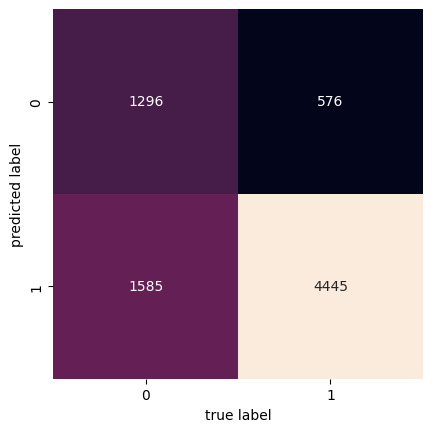

In [ ]:
#from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_val_svm3, yfit_svm_rbf3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

Aplicación de Redes Neuronales (Perceptrón-Multicapa)

Desde scratch

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler


In [ ]:
#separación del dataset en training & test
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(mode_df[['NACIONAL','APARATOS','DELICTIVO','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_mlp, x_val_mlp, y_tr_mlp, y_val_mlp = train_test_split(X_train_mlp, y_train_mlp, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_mlp.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento

xs_tr_mlp = StandardScaler().fit_transform(x_tr_mlp)

Definición de la arquitectura del modelo

Se utiliza un modelo simple de tipo secuencial que incluye una línea contínua de capas agregadas. En las capas ocultas se ha utilizado una función de activación 'Relu'

In [ ]:
model_mlp = Sequential()
model_mlp.add(Dense(16, input_dim=9, activation='relu'))#en cada muestra existen 8 valores correspondientes a las variables predictoras
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(32, activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(64, activation='relu'))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(1, activation='sigmoid'))

Compilación del modelo

In [ ]:
model_mlp.compile(loss='binary_crossentropy',
       optimizer=Adam(learning_rate=0.001),
       metrics=['accuracy'])#se utiliza el optimizador Adam por cuanto el dataset es grande y sería mejor que un SGD

Estandarización de las variables predictoras de validación

In [ ]:
xs_val_mlp = StandardScaler().fit_transform(x_val_mlp)#la variable de salida no hace falta estandarizar por ser binaria

Entrenamiento del modelo

In [ ]:
history1=model_mlp.fit(xs_tr_mlp, y_tr_mlp,
    epochs=10,
    verbose=1,#para mostrar el resultado por cada epoch
    batch_size=256,
    validation_data=(xs_val_mlp, y_val_mlp))

Epoch 1/10
278/278 [==============================] - 5s 5ms/step - loss: 0.2100 - accuracy: 0.9177 - val_loss: 0.0290 - val_accuracy: 0.9942
Epoch 2/10
278/278 [==============================] - 1s 4ms/step - loss: 0.0423 - accuracy: 0.9916 - val_loss: 0.0262 - val_accuracy: 0.9948
Epoch 3/10
278/278 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9930 - val_loss: 0.0256 - val_accuracy: 0.9954
Epoch 4/10
278/278 [==============================] - 1s 4ms/step - loss: 0.0323 - accuracy: 0.9941 - val_loss: 0.0250 - val_accuracy: 0.9956
Epoch 5/10
278/278 [==============================] - 1s 4ms/step - loss: 0.0306 - accuracy: 0.9945 - val_loss: 0.0248 - val_accuracy: 0.9954
Epoch 6/10
278/278 [==============================] - 1s 4ms/step - loss: 0.0295 - accuracy: 0.9949 - val_loss: 0.0246 - val_accuracy: 0.9954
Epoch 7/10
278/278 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9949 - val_loss: 0.0250 - val_accuracy: 0.9954
Epoch 

Evaluación del modelo

In [ ]:
score = model_mlp.evaluate(xs_val_mlp, y_val_mlp, batch_size=256)

31/31 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9954


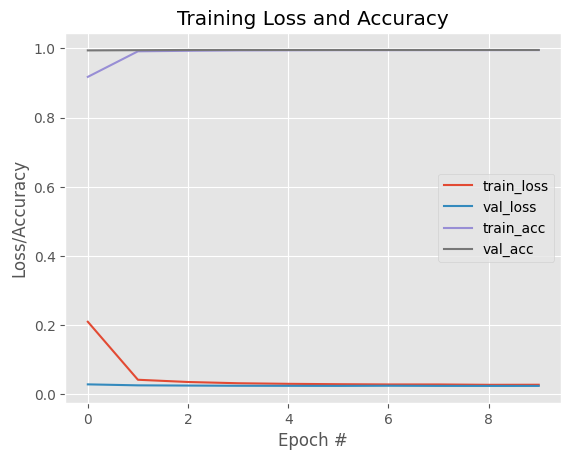

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                160       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

# Optimización y/o Regularización


Árboles de decisión. (Hiperparámetro: Profundidad del árbol)

In [ ]:
# criterion: gini
# splitter: best/random
# max_depth: low value avoid overfitting
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#importación de librerías para análisis CROSS VALIDATION
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

Definición de función para plot de la Matriz de Confusión

In [ ]:
#definición de función para generación de la Matriz de Confusión
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    #fmt = '.2f' if normalize else 'd'
    #thresh = cm.max() / 2.
    #for i in range(cm.shape[0]):
    #    for j in range(cm.shape[1]):
    #        ax.text(j, i, format(cm[i, j],fmt),
    #                ha="center", va="center",
    #                color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Arbol de decisión con 3 variables con profundidad optimizada

In [ ]:
#separación del dataset en training & test
train,test= train_test_split(mode_df[['EDAD','delta_horas','delta_horas_avistamiento','status_binar']], test_size=0.2, random_state=42)

In [ ]:
# reset index
train.reset_index(drop = True, inplace = True)
train.head()

,EDAD,delta_horas,delta_horas_avistamiento,status_binar
0,16.0,5597.0,0.0,0
1,23.0,50.0,0.0,1
2,26.0,39.0,0.0,0
3,36.0,129.0,0.0,0
4,0.0,440.0,0.0,0


profundidad del árbol como hiperparámetro

Análisis de Cross validation

Prueba de valor máximo del accuracy en función a la profundidad del árbol

Max Depth Value 0.7013427379334323 (7)


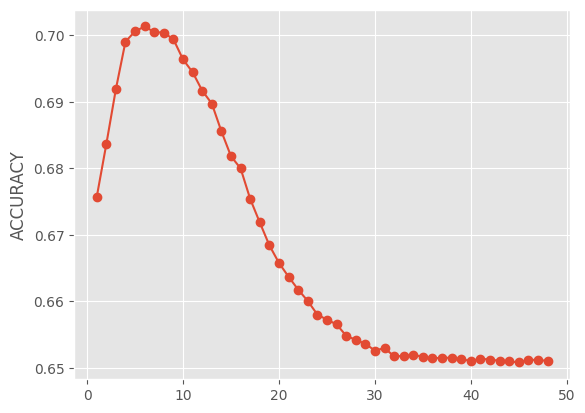

In [ ]:

#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle = True, random_state=42) #

total_scores = []
for i in range(2, 50):
   model = DecisionTreeClassifier(criterion='gini', max_depth=i)
   fold_accuracy = []
   for train_fold, test_fold in cv.split(train):
      # División train test aleatoria
      f_train = train.loc[train_fold]
      f_test = train.loc[test_fold]#En test se está probando la división final del dataset
      # entrenamiento y ejecución del modelo
      model.fit( X = f_train.drop(['status_binar'], axis=1), y = f_train['status_binar'])
      y_pred = model.predict(X = f_test.drop(['status_binar'], axis = 1))
      # evaluación del modelo
      acc = accuracy_score(f_test['status_binar'], y_pred)
      fold_accuracy.append(acc)
   total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

max_depth = np.argmax(total_scores) + 2 # +2 porque el range se definió (2, 50) y argmax
# devuelve el índice del vector cuyo valor es máximo, y ese vector está indexado comenzando en 0
print ('Max Depth Value ' + str(max(total_scores)) +" (" + str(max_depth) + ")")

plt.plot(range(1,len(total_scores)+1), total_scores,
         marker='o')
plt.ylabel('ACCURACY')

plt.show()

Construcción del modelo

la mejor parametrización para la profundidad del árbol ha sido  de 7   y se procede a la ejecución del modelo y graficar sus resultados.

Recordamos que al final del paso 1 hemos dividido en entrenamiento/tuneado y test

In [ ]:
# constructor
model_tree = DecisionTreeClassifier(criterion='gini', max_depth = 7)
# entrenamiento del modelo and prediccción
model_tree.fit( X = train.drop(['status_binar'], axis=1), y = train['status_binar'])
y_pred = model_tree.predict(X = test.drop(['status_binar'], axis = 1))

Plot del árbol de decisión

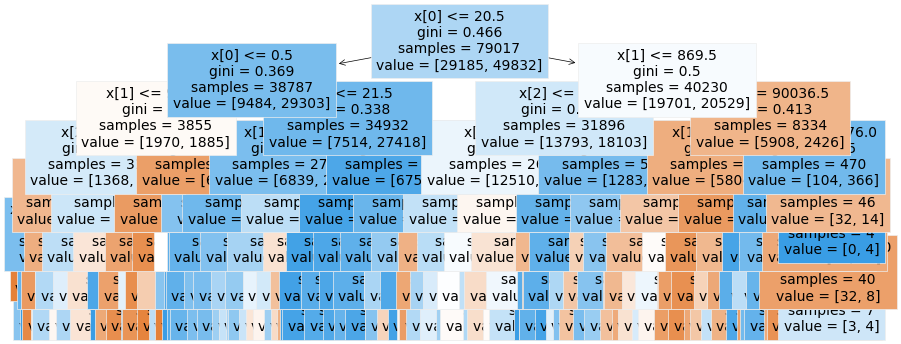

In [ ]:
#plot arbol de decisión
plt.figure('Arbol de decisión', figsize=[10,4])
plot_tree(model_tree, fontsize=10, filled=True)
plt.show()

Predicción de valores

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

Mediciones de performance y Matriz de confusión

              precision    recall  f1-score   support

           0       0.63      0.51      0.56      7396
           1       0.74      0.82      0.78     12359

    accuracy                           0.70     19755
   macro avg       0.68      0.66      0.67     19755
weighted avg       0.70      0.70      0.70     19755

Confusion matrix, without normalization
[[ 3769  3627]
 [ 2240 10119]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

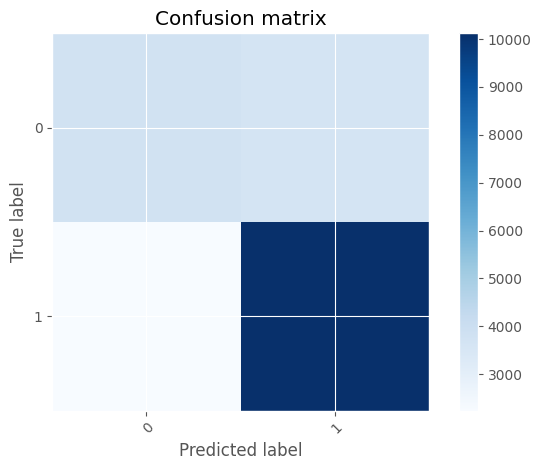

In [ ]:
y_true = test['status_binar']
print(classification_report(y_true, y_pred))

plot_confusion_matrix(y_true, y_pred, normalize=False, classes=model.classes_, title='Confusion matrix')

Habiendo optimizado el hiperparámetro profundidad del árbol se observa que al ejecutar cross validation con 10 folds se maximiza la performance del modelo con 7 de profundidad(divisiones antes de llegar a la hoja) alcanzando un resultado de 70.13%. Cuando se prueba con el dataset de test el resultado es ligeramene mejor que el de validación hecho anteriormente al alcanzar un accuracy general del 70%

**Árbol de decisión con 5 variables y optimización en función de la profundidad del árbol**

Para este escenario se han seleccionado las variables de mayor correlación o las de mayor relevancia obtenidos de los reportes de relevancia de características

In [ ]:
#separación del dataset en training & test
train1,test1= train_test_split(mode_df[['EDAD','delta_horas','delta_horas_avistamiento','GENERO','region_ordinal','status_binar']], test_size=0.2, random_state=42)

In [ ]:
# reset index
train1.reset_index(drop = True, inplace = True)
train1.head()

,EDAD,delta_horas,delta_horas_avistamiento,GENERO,region_ordinal,status_binar
0,16.0,5597.0,0.0,1,2,0
1,23.0,50.0,0.0,0,1,1
2,26.0,39.0,0.0,1,3,0
3,36.0,129.0,0.0,1,2,0
4,0.0,440.0,0.0,0,3,0


Análisis de cross validation en árbol con 5 variables

Max Depth Value 0.7426375085046215 (9)


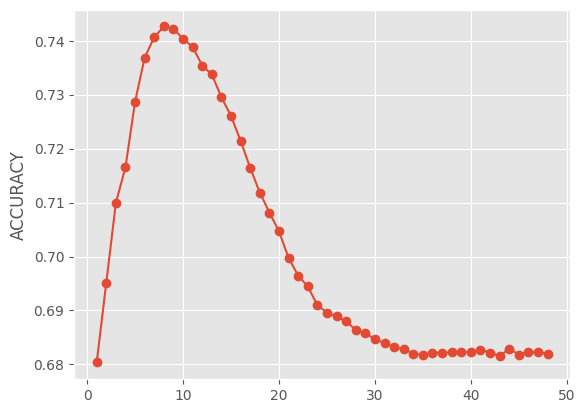

In [ ]:

#from sklearn.metrics import accuracy_score
#from sklearn.model_selection import KFold

cv1 = KFold(n_splits = 10, shuffle = True, random_state=42) #

total_scores1 = []
for i in range(2, 50):
   model1 = DecisionTreeClassifier(criterion='gini', max_depth=i)
   fold_accuracy1 = []
   for train_fold, test_fold in cv1.split(train1):
      # División train test aleatoria
      f_train1 = train1.loc[train_fold]
      f_test1 = train1.loc[test_fold]#En test se está probando la división final del dataset
      # entrenamiento y ejecución del modelo
      model1.fit( X = f_train1.drop(['status_binar'], axis=1), y = f_train1['status_binar'])
      y_pred1 = model1.predict(X = f_test1.drop(['status_binar'], axis = 1))
      # evaluación del modelo
      acc1 = accuracy_score(f_test1['status_binar'], y_pred1)
      fold_accuracy1.append(acc1)
   total_scores1.append(sum(fold_accuracy1)/len(fold_accuracy1))

max_depth1 = np.argmax(total_scores1) + 2 # +2 porque el range se definió (2, 50) y argmax
# devuelve el índice del vector cuyo valor es máximo, y ese vector está indexado comenzando en 0
print ('Max Depth Value ' + str(max(total_scores1)) +" (" + str(max_depth1) + ")")

plt.plot(range(1,len(total_scores1)+1), total_scores1,
         marker='o')
plt.ylabel('ACCURACY')

plt.show()

Construcción del modelo

la mejor parametrización para la profundidad del árbol ha sido de 9 y se procede a la ejecución del modelo y graficar sus resultados.

Se Recuerda que al final del paso 1 se ha dividido el dataframe en entrenamiento/tuneado y test

In [ ]:
# constructor
model_tree1 = DecisionTreeClassifier(criterion='gini', max_depth = 9)
# entrenamiento del modelo y prediccción
model_tree1.fit( X = train1.drop(['status_binar'], axis=1), y = train1['status_binar'])
y_pred1 = model_tree1.predict(X = test1.drop(['status_binar'], axis = 1))

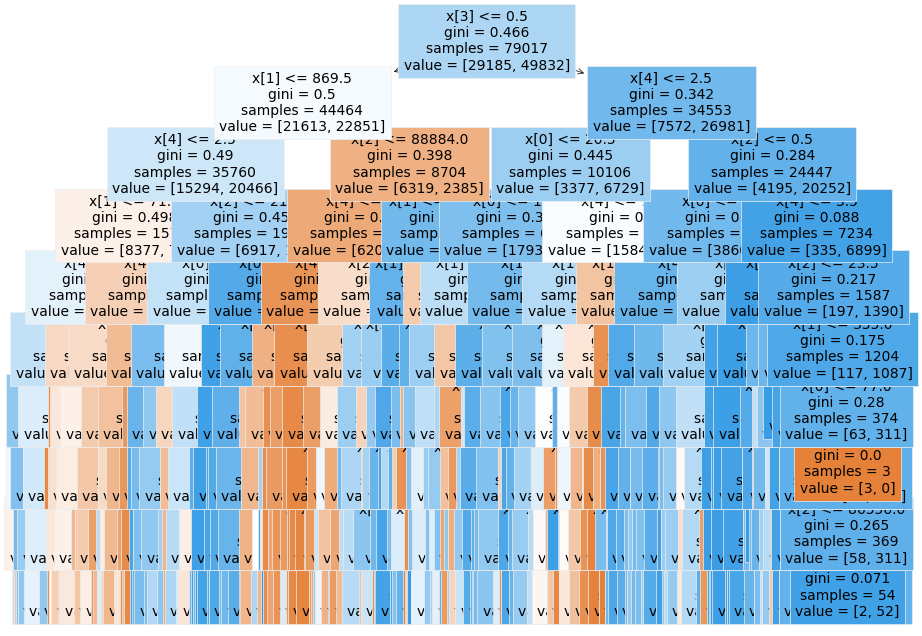

In [ ]:
#plot arbol de decisión
plt.figure('Arbol de decisión profundidad optimizada 5 variables ', figsize=[10,8])
plot_tree(model_tree1, fontsize=10, filled=True)
plt.show()

Se observa en el árbol de decisión que las variables con mayor poder de discriminación ubicadas en los nodos de los 2 primeros niveles corresponden a género, el delta de horas entre el evento y reporte y la región geográfica donde se produjo el evento.

Predicción del árbol de decisión

In [ ]:
y_pred1

array([1, 1, 1, ..., 1, 1, 0])

Mediciones de performance y matriz de confusión

              precision    recall  f1-score   support

           0       0.69      0.55      0.61      7396
           1       0.76      0.85      0.80     12359

    accuracy                           0.74     19755
   macro avg       0.72      0.70      0.71     19755
weighted avg       0.73      0.74      0.73     19755

Confusion matrix, without normalization
[[ 4049  3347]
 [ 1846 10513]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

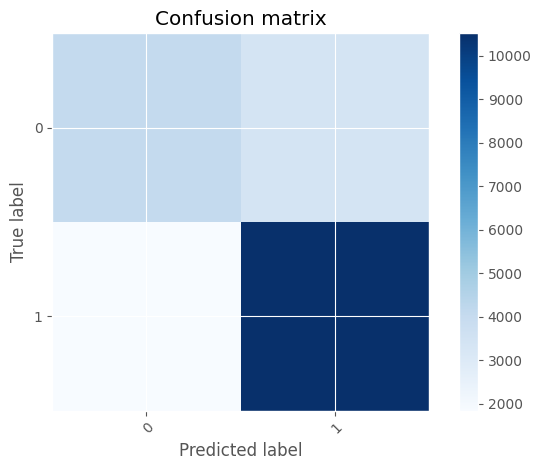

In [ ]:
y_true1 = test1['status_binar']
print(classification_report(y_true1, y_pred1))

plot_confusion_matrix(y_true1, y_pred1, normalize=False, classes=model.classes_, title='Confusion matrix')

**Optimización y regularización de SVM**

Importación de librerías necesarias para optimización de SVM con Random Search -Grid Search-

In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento
from sklearn.preprocessing import StandardScaler
#librerías necesarias para la modelación
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC#Support vector Classifier"
#Tunning de hiper-parámetros
#se ha importado hyperopt y cross_val_score para ensayar con optimización Bayesiana
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

Definición del dataframe aplicable a SVM optimizado. Se ha excluido la variable redundante

In [ ]:
#Definición de dataframe para fines de modelización
mode_df5=df[['GENERO','EDAD','APARATOS','delta_horas','delta_horas_avistamiento','region_ordinal','status_binar']]

División del dataframe and training & test. ( No se aplica una subdivisón adicional porque de esta se encargará el proceso de Cross Validation)

In [ ]:
#separación del dataset en training & test
X_train_svm_op, X_test_svm_op, y_train_svm_op, y_test_svm_op = train_test_split(mode_df5[['GENERO','EDAD','APARATOS','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df5['status_binar'], test_size=0.2, random_state=42)
#número de registros en training
print(X_train_svm_op.shape)
print(X_test_svm_op.shape)

(79017, 6)
(19755, 6)


Estandarización de características

In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento
xs_train_svm_op = pd.DataFrame(StandardScaler().fit_transform(X_train_svm_op))
# estandarización de los datos de las variables predictoras en Test
xs_test_svm_op = pd.DataFrame(StandardScaler().fit_transform(X_test_svm_op))
#resumen de estadísticos
xs_train_svm_op.describe().T

,count,mean,std,min,25%,50%,75%,max
0,79017.0,9.612744e-17,1.000006,-0.881533,-0.881533,-0.881533,1.134387,1.134387
1,79017.0,1.708533e-18,1.000006,-1.565882,-0.642820,-0.273595,0.526392,3.972490
2,79017.0,-5.395366e-19,1.000006,-0.239720,-0.239720,-0.239720,-0.239720,4.171537
3,79017.0,-1.335353e-17,1.000006,-0.204218,-0.201295,-0.198250,-0.185217,21.047555
4,79017.0,2.967451e-18,1.000006,-22.054651,-0.105685,-0.105685,-0.105622,31.960997
5,79017.0,1.384811e-17,1.000006,-1.552473,-0.985215,0.149300,0.716558,2.418331


Creación de modelo SVM con hiperparámetros por default como base

In [ ]:
model_svc= SVC(max_iter=1000000)#instancia de Support Vector Classifier incluyendo 1000K iteracones como  máximo
params= model_svc.get_params()
params_df_svc=pd.DataFrame(params, index=[0])
params_df_svc.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,1000000


Entrenamiento del modelo

Warning: tiempo de entrenamiento aproximado. 4 mins

In [ ]:
#entrenamiento del modelo con parámetos por default sobre los datos estandarizados
model_svc.fit(xs_train_svm_op, y_train_svm_op)
#impresión del accuracy
print(f'score accuracy del modelo: {model_svc.score(X_test_svm_op, y_test_svm_op):.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names



score accuracy del modelo: 0.3779


**Uso de gridsearch para la búsqueda de la mejor combinación de hiperparámetros**

Definición del espacio de búsqueda

In [ ]:
#espacio de búsqueda
param_grid_svm={
    #parametro de regularizacion
    'C':[1,10,100],
    #tipo de kernel
    'kernel':['rbf','poly'],# se podría probar con 2 tipos de kernel 'rbf' y 'polinomial'
    #Gamma como coeficiente del kernel para 'rbf','poly'&'sigmoid'
    'gamma':[0.1,0.01,0.001]
}
#tipo de score
scoring=['accuracy']
#tipo de kfold en cross validation
#usando StratifiedKFold para que no exista posibilidad de solapamiento entre Training & test
kfold= StratifiedKFold(n_splits=3, shuffle=True, random_state=42)#shuffle antes de la divsión

Aplicación de Cross Validation en GridSearch para la búsqueda de parámetros óptimos

Warning: Tiempo de procesamiento aprox. 40 minutos con alta capacidad de RAM

In [ ]:
#definición de GridSearch
grid_search=GridSearchCV(estimator=model_svc,#usando Support Vector Classifier como modelo
                         param_grid=param_grid_svm,
                         scoring=scoring,#uso de 'accuracy' como métrica de evaluación
                         refit='accuracy',#usando los mejores parámetros en todo el dataset de entre
                         n_jobs=-1,#uso de procesamiento de unidades en paralelo
                         cv=kfold,#usando StratifiedKFold
                         verbose=0)#poca información a recibir del GridSearch
#obtención de parámetros aplicando los datos
grid_result=grid_search.fit(xs_train_svm_op,y_train_svm_op)
#resumen de resultados
grid_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning:

Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=SVC(max_iter=1000000), n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['accuracy'])

Muestra de los mejores parámetros para los resultados de entrenamiento

In [ ]:
print(f'El mejor score de accuracy en entrenamiento:{grid_result.best_score_:.4f}')
print(f'Los mejores hiperparámetros :{grid_result.best_params_}')
print(f'El mejor score de accuracy en el dataset de test:{grid_search.score(xs_test_svm_op,y_test_svm_op):.4f}')

El mejor score de accuracy en entrenamiento:0.7195
Los mejores hiperparámetros :{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
El mejor score de accuracy en el dataset de test:0.7182


Tanto con 100 como con 1000 iteraciones el accuracy en entrenamiento con cross validation es 0.6293.

Con 10000 iteraciones el accuracy en entrenamiento con cross validation es 0.6473.

Con 100000 iteraciones el accuracy en entrenamiento con CV es 0.6914 y en test 0.6930.

Con 1000000 iteraciones el accuracy en entrenamiento con CV es 0.7195 y en test 0.7182

**Optimización de la Red Neuronal y Regularización**

Optimización de hiperparámetros y capas en la red neuronal usando la librería hyperopt

Optimización de la Red Neuronal incluyendo la variable redundante Cambio de Estado

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
# hp: define the hyperparameter space
# fmin: optimization function
# Trials: to evaluate the different searched hyperparameters
from hyperopt import hp, fmin

# the search algorithms
from hyperopt import tpe

In [ ]:
#separación del dataset en training & test
X_train_mlp_op, X_test_mlp_op, y_train_mlp_op, y_test_mlp_op = train_test_split(mode_df[['NACIONAL','APARATOS','DELICTIVO','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_mlp_op, x_val_mlp_op, y_tr_mlp_op, y_val_mlp_op = train_test_split(X_train_mlp_op, y_train_mlp_op, test_size=0.1, random_state=42)
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_mlp_op.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento

xs_tr_mlp_op = StandardScaler().fit_transform(x_tr_mlp_op)

estandarización de variables predictoras en validación

In [ ]:
xs_val_mlp_op = StandardScaler().fit_transform(x_val_mlp_op)#la variable de salida no hace falta estandarizar por ser binaria

Definición del espacio de hiperparámetros

In [ ]:
#espacio de hiperparámetros
param_grid = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(16), (16,32),(32,64,128) ]),
    'activation': hp.choice('activation', ["tanh", "relu"]),
    'dropout': hp.uniform('dropout', 0.0, 0.5),
    'solver': hp.choice('solver', ["adam", "sgd"]),
    'learning_rate_init': hp.loguniform('learning_rate_init', np.log(0.0001), np.log(1)),
}

Definición dela función objetivo (Minimización)

In [ ]:
# la función objetivo toma el espacio de hiperparámetros
# como input

def objective(params):

    # se usa un diccionario para indicar los varlores del espacio
    # para asignar cada valor del hiperparámetro al xgb
    params_dict = {
        'hidden_layer_sizes': params['hidden_layer_sizes'],
        'activation': params['activation'],
        'solver': params['solver'],
        'learning_rate_init': params['learning_rate_init'],
        'random_state': 1000,
        'max_iter': 100,
    }

    # con ** se pasa los items del diccionario como parametros
    # al modelo xgb
    mlp = MLPClassifier(**params_dict)

    # entrenamiento con cross validation
    # n_jobs es el numero de tabajos en paralelo a ejecutar en la función GridSearch
    score = cross_val_score(mlp, xs_tr_mlp_op,y_tr_mlp_op ,
                            scoring='accuracy', cv=5, n_jobs=4).mean()

    # para minimizar, se vuelve negativo el score(accuracy)
    return -score

Prueba de la ejecución con un ejemplo

In [ ]:

# paso de algunos hiperámetros para prueba.

default_parameters = {
    'hidden_layer_sizes': (10),
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate_init': 0.001,
    'random_state': 1000,
    'max_iter': 10,
}


objective(default_parameters)

-0.9951768262673136

TPE (Tree-structured Parzen Estimator)

In [ ]:
#https://hyperopt.github.io/hyperopt/
# fmin ejecuta la minimización
#
# i.e., ejecución del random search
#fmin es la función de minimización según la librería
best_algo = fmin(
    fn=objective,
    space=param_grid,
    max_evals=50,
    #rstate=np.random.RandomState(42)
    rstate=np.random.default_rng(42),
    algo=tpe.suggest,  # randomized search algorithm
)

100%|██████████| 50/50 [13:59<00:00, 16.80s/trial, best loss: -0.9951908879983126]


In [ ]:
best_algo

{'activation': 1,
 'dropout': 0.43046524095671734,
 'hidden_layer_sizes': 0,
 'learning_rate_init': 0.027101707182655654,
 'solver': 1}

La red neuronal optimizada tendría una función de activación tanh, con 2 capas ocultas, con un optimizador adam y valores de drop out y learning rate indicados

Aplicación de la red neuronal considerando los parámetros optimizados

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.regularizers import L2

In [ ]:
#separación del dataset en training & test
X_train_mlp1, X_test_mlp1, y_train_mlp1, y_test_mlp1 = train_test_split(mode_df[['NACIONAL','APARATOS','DELICTIVO','GENERO','CAMBIO ESTADO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_mlp1, x_val_mlp1, y_tr_mlp1, y_val_mlp1 = train_test_split(X_train_mlp1, y_train_mlp1, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_mlp1.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento

xs_tr_mlp1 = StandardScaler().fit_transform(x_tr_mlp1)

Arquitectura de la red neuronal incluyendo parámetros optimizados

Se agrega el parámetro de regularización L2 para que todas las características tenga similar importancia y no sobresalga la variable redundante Cambio de Estado

In [ ]:
model_mlp1 = Sequential()
#model_mlp1.add(Dense(16, input_dim=9, activation='tanh'))
model_mlp1.add(Dense(16, input_dim=9, activation='relu',kernel_regularizer=L2(0.001)))
model_mlp1.add(Dropout(0.4304652409))
#model_mlp1.add(Dense(32, activation='tanh'))
#model_mlp1.add(Dense(32, activation='relu',kernel_regularizer=L2(0.001)))
#model_mlp1.add(Dropout(0.4304652409))
model_mlp1.add(Dense(1, activation='sigmoid'))

Compilación del modelo a optimizar

In [ ]:
model_mlp1.compile(loss='binary_crossentropy',
       optimizer=SGD(learning_rate=0.0271017071),
       metrics=['accuracy'])#Se usa el optimizador Adam que es el sugerido por Hyperopt

Estandarización de variables predictoras de validación

In [ ]:
xs_val_mlp1 = StandardScaler().fit_transform(x_val_mlp1)#la variable de salida no hace falta estandarizar por ser binaria

Entrenamiento del modelo

In [ ]:
history2=model_mlp1.fit(xs_tr_mlp1, y_tr_mlp1,
    epochs=10,
    verbose=1,#para mostrar el resultado por cada epoch
    batch_size=256,
    validation_data=(xs_val_mlp1, y_val_mlp1))

Epoch 1/10
278/278 [==============================] - 2s 4ms/step - loss: 0.4130 - accuracy: 0.8639 - val_loss: 0.1619 - val_accuracy: 0.9916
Epoch 2/10
278/278 [==============================] - 1s 3ms/step - loss: 0.1717 - accuracy: 0.9671 - val_loss: 0.0748 - val_accuracy: 0.9942
Epoch 3/10
278/278 [==============================] - 1s 3ms/step - loss: 0.1199 - accuracy: 0.9778 - val_loss: 0.0538 - val_accuracy: 0.9942
Epoch 4/10
278/278 [==============================] - 1s 3ms/step - loss: 0.0987 - accuracy: 0.9830 - val_loss: 0.0468 - val_accuracy: 0.9944
Epoch 5/10
278/278 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9850 - val_loss: 0.0438 - val_accuracy: 0.9946
Epoch 6/10
278/278 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9866 - val_loss: 0.0422 - val_accuracy: 0.9946
Epoch 7/10
278/278 [==============================] - 1s 3ms/step - loss: 0.0774 - accuracy: 0.9875 - val_loss: 0.0412 - val_accuracy: 0.9947
Epoch 

Evaluación del modelo

In [ ]:
score1 = model_mlp1.evaluate(xs_val_mlp1, y_val_mlp1, batch_size=256)

31/31 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9952


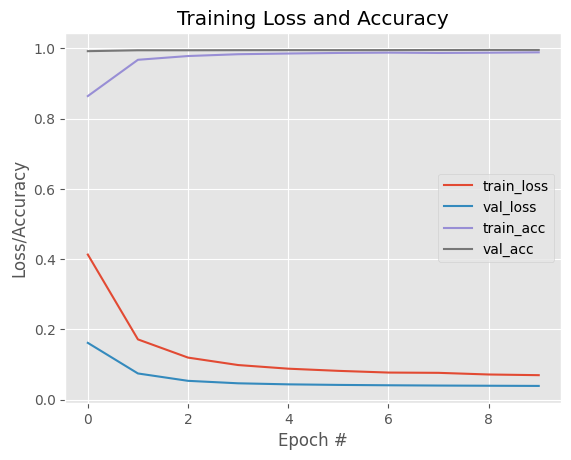

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), history2.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), history2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), history2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 10), history2.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model_mlp1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                160       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 177 (708.00 Byte)
Trainable params: 177 (708.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Optimización de la Red Neuronal excluyendo la variable redundante Cambio de Estado

Se excluye la variable redundante 'Cambio de Estado' por cuanto en el experimento precedente no se logró corregir los pesos de esta variable a pesaer de haber aplicado un factor de regularización L2 en las capas densas

In [ ]:
#separación del dataset en training & test
X_train_mlp_op2, X_test_mlp_op2, y_train_mlp_op2, y_test_mlp_op2 = train_test_split(mode_df[['NACIONAL','APARATOS','DELICTIVO','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_mlp_op2, x_val_mlp_op2, y_tr_mlp_op2, y_val_mlp_op2 = train_test_split(X_train_mlp_op2, y_train_mlp_op2, test_size=0.1, random_state=42)
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_mlp_op2.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento

xs_tr_mlp_op2 = StandardScaler().fit_transform(x_tr_mlp_op2)

Definición del espacio de hiperparámetros

In [ ]:
#espacio de hiperparámetros
param_grid2 = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(16), (16,32),(32,64,128) ]),
    'activation': hp.choice('activation', ["tanh", "relu"]),
    'dropout': hp.uniform('dropout', 0.0, 0.5),
    'solver': hp.choice('solver', ["adam", "sgd"]),
    'learning_rate_init': hp.loguniform('learning_rate_init', np.log(0.0001), np.log(1)),
}

Definición de la función objetivo Minimización

In [ ]:
# la función objetivo toma el espacio de hiperparámetros
# como input

def objective2(params):

    # se usa un diccionario para indicar los varlores del espacio
    # para asignar cada valor del hiperparámetro al xgb
    params_dict = {
        'hidden_layer_sizes': params['hidden_layer_sizes'],
        'activation': params['activation'],
        'solver': params['solver'],
        'learning_rate_init': params['learning_rate_init'],
        'random_state': 1000,
        'max_iter': 100,
    }

    # con ** se pasa los items del diccionario como parametros
    # al modelo xgb
    mlp = MLPClassifier(**params_dict)

    # entrenamiento con cross validation
    # n_jobs es el numero de tabajos en paralelo a ejecutar en la función GridSearch
    score2 = cross_val_score(mlp, xs_tr_mlp_op2,y_tr_mlp_op2 ,
                            scoring='accuracy', cv=5, n_jobs=4).mean()

    # para minimizar, se vuelve negativo el score(accuracy)
    return -score2

In [ ]:

# paso de algunos hiperámetros para prueba.

default_parameters = {
    'hidden_layer_sizes': (10),
    'activation': 'relu',
    'solver': 'adam',
    'learning_rate_init': 0.001,
    'random_state': 1000,
    'max_iter': 10,
}


objective2(default_parameters)

-0.724629121844899

TPE(Tree structured Parzen Estimator)

Warning: la ejecución de esta celda toma aproximadamente 1 hora

In [ ]:
#https://hyperopt.github.io/hyperopt/
# fmin ejecuta la minimización
#
# i.e., ejecución del random search
#fmin es la función de minimización según la librería
best_algo2 = fmin(
    fn=objective2,
    space=param_grid2,
    max_evals=50,
    rstate=np.random.default_rng(42),
    algo=tpe.suggest,  # randomized search algorithm
)

100%|██████████| 50/50 [1:11:14<00:00, 85.49s/trial, best loss: -0.7405329396048653] 


In [ ]:
#hiper-parámetros optimizados
best_algo2

{'activation': 1,
 'dropout': 0.23210364913087725,
 'hidden_layer_sizes': 2,
 'learning_rate_init': 0.0015498059839274116,
 'solver': 0}

Arquitectura de la red neuronal incorporando parámetros optimizados para el modelo que excluye la variable redundante 'Cambio de Estado'

In [ ]:
#separación del dataset en training & test
X_train_mlp2, X_test_mlp2, y_train_mlp2, y_test_mlp2 = train_test_split(mode_df[['NACIONAL','APARATOS','DELICTIVO','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal']],mode_df['status_binar'], test_size=0.2, random_state=42)

In [ ]:
#separación del dataset para training y para validación
x_tr_mlp2, x_val_mlp2, y_tr_mlp2, y_val_mlp2 = train_test_split(X_train_mlp2, y_train_mlp2, test_size=0.1, random_state=42) # 3 subconjuntos es de vital importancia
#el random_state  es para que la semilla sea reproducible y siempre haga la misma partición
print(y_tr_mlp2.shape)

(71115,)


In [ ]:
# estandarización de los datos de las variables predictoras en entrenamiento

xs_tr_mlp2 = StandardScaler().fit_transform(x_tr_mlp2)

Arquitectura de la Red incluyendo los parámetros optimizados

In [ ]:
model_mlp2 = Sequential()
model_mlp2.add(Dense(16, input_dim=8, activation='relu'))
model_mlp2.add(Dropout(0.2321036491))
model_mlp2.add(Dense(32, activation='relu'))
model_mlp2.add(Dropout(0.2321036491))
model_mlp2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_mlp2.compile(loss='binary_crossentropy',
       optimizer=Adam(learning_rate=0.0015498059),
       metrics=['accuracy'])#Se usa el optimizador Adam que es el sugerido por Hyperopt

Estandarización de variable predictora en validación

In [ ]:
xs_val_mlp2 = StandardScaler().fit_transform(x_val_mlp2)#la variable de salida no hace falta estandarizar por ser binaria

Entrenamiento del modelo

In [ ]:
history3=model_mlp2.fit(xs_tr_mlp2, y_tr_mlp2,
    epochs=40,
    verbose=1,#para mostrar el resultado por cada epoch
    batch_size=256,
    validation_data=(xs_val_mlp2, y_val_mlp2))

Epoch 1/40
278/278 [==============================] - 2s 4ms/step - loss: 0.6107 - accuracy: 0.6691 - val_loss: 0.5797 - val_accuracy: 0.6982
Epoch 2/40
278/278 [==============================] - 1s 4ms/step - loss: 0.5915 - accuracy: 0.6881 - val_loss: 0.5716 - val_accuracy: 0.7055
Epoch 3/40
278/278 [==============================] - 1s 4ms/step - loss: 0.5844 - accuracy: 0.6913 - val_loss: 0.5660 - val_accuracy: 0.7077
Epoch 4/40
278/278 [==============================] - 1s 4ms/step - loss: 0.5802 - accuracy: 0.6925 - val_loss: 0.5610 - val_accuracy: 0.7070
Epoch 5/40
278/278 [==============================] - 1s 4ms/step - loss: 0.5744 - accuracy: 0.6980 - val_loss: 0.5579 - val_accuracy: 0.7183
Epoch 6/40
278/278 [==============================] - 1s 4ms/step - loss: 0.5713 - accuracy: 0.6992 - val_loss: 0.5538 - val_accuracy: 0.7234
Epoch 7/40
278/278 [==============================] - 1s 4ms/step - loss: 0.5672 - accuracy: 0.7026 - val_loss: 0.5480 - val_accuracy: 0.7226
Epoch 

Evaluación del modelo

In [ ]:
score2 = model_mlp2.evaluate(xs_val_mlp2, y_val_mlp2, batch_size=256)

31/31 [==============================] - 0s 2ms/step - loss: 0.5287 - accuracy: 0.7294


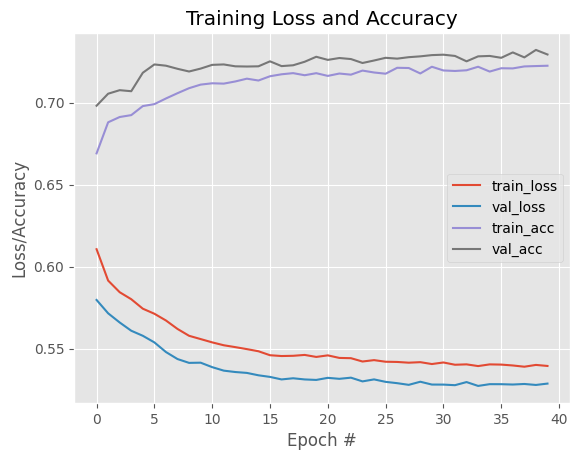

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 40), history3.history["loss"], label="train_loss")
plt.plot(np.arange(0, 40), history3.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 40), history3.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 40), history3.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model_mlp2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                144       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                544       
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Aplicación de Conjuntos de Modelos de Árboles de Decisión y optimización**

**Modelo Random Forest**

Importación de librerías

In [ ]:
#librerías útiles para la aplicación del modelo
from scipy.stats import randint as sp_randint
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

Utilización de las variables predictoras(todas) exceptuando la variable redundante de 'Cambio de Estado'. Se han incluido todas las variables válidas a fin de que los modelos puedan considerar todas las variables para la construcción de los árboles y se determine la importancia de las características

In [ ]:
#separación del dataset en training & test
train3,test3= train_test_split(mode_df[['NACIONAL','APARATOS','DELICTIVO','EDAD','delta_horas','delta_horas_avistamiento','GENERO','region_ordinal','status_binar']], test_size=0.2, random_state=42)

In [ ]:
# reseteo del index para evitar problemas en la validación cruzada
train3.reset_index(drop = True, inplace = True)
train3.head()

,NACIONAL,APARATOS,DELICTIVO,EDAD,delta_horas,delta_horas_avistamiento,GENERO,region_ordinal,status_binar
0,0,0,0,16.0,5597.000000,0.0,1,2,0
1,0,0,0,23.0,49.516667,0.0,0,1,1
2,0,0,0,26.0,39.000000,0.0,1,3,0
3,0,0,0,36.0,129.000000,0.0,1,2,0
4,0,0,0,0.0,440.333333,0.0,0,3,0


Parametrización

In [ ]:
#instanciación del elemento clasificador
rfc = RandomForestClassifier(random_state=42)

Creación del conjunto de parámetros a muestrear

In [ ]:
param_dist_rf = {"n_estimators": [2, 4, 8, 16, 32, 64], # Número de árboles
              "max_features": ['sqrt','log2'], # Número de características a considerar en cada división
              "max_depth": [12,9,8,7,2,None], # Máximo número de niveles en el arbol
              "min_samples_split": sp_randint(2, 100), #  Número mínimo de muestras requeridas para dividir un nodo
              "min_samples_leaf": sp_randint(1, 100), # Número mínimo de muestras requeridas en cada nodo hoja
              "bootstrap": [True, False], # Si es falso todo el dataset es usado para construir cada árbol
              "criterion": ["gini", "entropy"]}#criterio de error
#si bootsgrap es True por default la métrica de evaluación es Accuracy_score
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Entrenamiento del modelo con Random Search

In [ ]:
#Como argumentos en Randomized Search se utiliza principalmente el número de iteraciones y número de validaciones cruzadas
rfc_classifier = RandomizedSearchCV(estimator = rfc, param_distributions = param_dist_rf,
                               scoring='accuracy', n_iter = 128, cv = 5, random_state=42, n_jobs = -1)
# n_jobs= -1 para usar todos los procesadores en paralelo
# Fit the random search model
rfc_classifier.fit(X = train3.drop(['status_binar'], axis=1), y = train3['status_binar'])

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=128, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [12, 9, 8, 7, 2, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a11dbe276d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a11dbe26650>,
                                        'n_estimators': [2, 4, 8, 16, 32, 64]},
                   random_state=42, scoring='accuracy')

In [ ]:
rfc_classifier.best_params_# para obtener los mejores parámetros en Rando Search

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 14,
 'min_samples_split': 96,
 'n_estimators': 64}

Ejecución del modelo con la mejor parametrización Random Search

In [ ]:
# seleccionar el mejor

best_random = rfc_classifier.best_estimator_
# fit and predict
best_random.fit( X = train3.drop(['status_binar'], axis=1), y = train3['status_binar'])
y_pred3 = best_random.predict(X = test3.drop(['status_binar'], axis = 1,))

# EVALUAR
accuracy = accuracy_score(test3['status_binar'], y_pred3)
precision = precision_score(test3['status_binar'], y_pred3)
print ('Accuracy', accuracy)
print ('Precision', precision)

Accuracy 0.7495317641103518
Precision 0.762633779856829


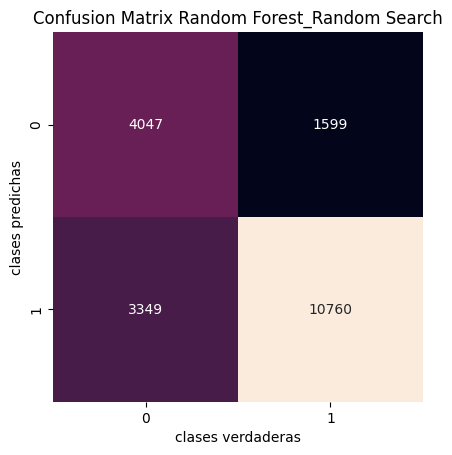

In [ ]:
#Matriz de confusión Random Search
mat_random = confusion_matrix(test3['status_binar'], y_pred3)
sns.heatmap(mat_random.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.title('Confusion Matrix Random Forest_Random Search')
plt.xlabel('clases verdaderas')
plt.ylabel('clases predichas');

In [ ]:
# FEATURE RELEVANCIES RANDOM FOREST_ RANDOM SEARCH
print ('Feature Relevancies')
pd.DataFrame({'Attributes': ('NACIONAL','APARATOS','DELICTIVO','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal') ,
              'Random Forest_Random Search': best_random.feature_importances_})

Feature Relevancies


,Attributes,Random Forest_Random Search
0,NACIONAL,0.027711
1,APARATOS,0.014396
2,DELICTIVO,0.002695
3,GENERO,0.178338
4,EDAD,0.241862
5,delta_horas,0.144718
6,delta_horas_avistamiento,0.145004
7,region_ordinal,0.245275


**Algoritmo Random Forest aplicando Grid Search**

Evaluación del modelo con el tablero de parámetros especificados

In [ ]:
#acotamiento de parámetros en base a los resultados de Random Search
param_dist_grid = {"n_estimators": [32, 64, 128], # Número de árboles
              "max_features": ['log2'], # Número de características a considerar en cada división
              "max_depth": [9,8,7,None], # Máximo número de niveles en el arbol. En None se expande hasta que las hojas sean puras
              "min_samples_split": [96, 128,256], #  Número mínimo de muestras requeridas para dividir un nodo
              "min_samples_leaf": [12,16], # Número mínimo de muestras requeridas en cada nodo hoja
              "bootstrap": [False], # Si es falso todo el dataset es usado para construir cada árbol
              "criterion": ["gini", "entropy"]}#criterio de error

Warning: Tiempo promedio de ejecución: 1 hora

In [ ]:
grid_classif = GridSearchCV(estimator = rfc, param_grid= param_dist_grid, cv=5)
# Fit the random search model
grid_classif.fit(X = train3.drop(['status_binar'], axis=1), y = train3['status_binar'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False], 'criterion': ['gini', 'entropy'],
                         'max_depth': [9, 8, 7, None], 'max_features': ['log2'],
                         'min_samples_leaf': [12, 16],
                         'min_samples_split': [96, 128, 256],
                         'n_estimators': [32, 64, 128]})

In [ ]:
grid_classif.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2', min_samples_leaf=12,
                       min_samples_split=96, n_estimators=64, random_state=42)

Entre los parámetros que se pudiera destacar en la ejecución del Random Forest están el de Bootstrap= False indicando que se necesita todo el dataset para la construcción de los árboles. Se considera el logaritmo en base 2 para el máximo de características. Se mejora el modelo al utilizar 64 estimadores que serían 64 árboles en total.

Ejecución del modelo con la mejor parametrización Grid Search

In [ ]:
# seleccionar el mejor

best_grid = grid_classif.best_estimator_
# fit and predict
best_grid.fit( X = train3.drop(['status_binar'], axis=1), y = train3['status_binar'])
y_pred3_grid_rf = best_grid.predict(X = test3.drop(['status_binar'], axis = 1,))

# EVALUAR
accuracy_grid_rf = accuracy_score(test3['status_binar'], y_pred3_grid_rf)
precision_grid_rf = precision_score(test3['status_binar'], y_pred3_grid_rf)
print ('Accuracy', accuracy_grid_rf)
print ('Precision', precision_grid_rf)

Accuracy 0.7499367248797773
Precision 0.7660856466537551


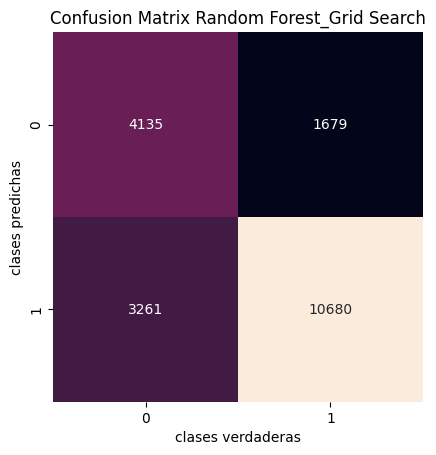

In [ ]:
#Matriz de confusión Grid Search sobre el modelo Random Forest
mat_grid_rf = confusion_matrix(test3['status_binar'], y_pred3_grid_rf)
sns.heatmap(mat_grid_rf.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.title('Confusion Matrix Random Forest_Grid Search')
plt.xlabel('clases verdaderas')
plt.ylabel('clases predichas');

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies Grid Search Random Forest')
pd.DataFrame({'Attributes': ('NACIONAL','APARATOS','DELICTIVO','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal') ,
              'Random Forests': best_grid.feature_importances_})

Feature Relevancies Grid Search Random Forest


,Attributes,Random Forests
0,NACIONAL,0.029445
1,APARATOS,0.014380
2,DELICTIVO,0.002556
3,GENERO,0.179977
4,EDAD,0.244276
5,delta_horas,0.142991
6,delta_horas_avistamiento,0.141687
7,region_ordinal,0.244687


**Boosting (Ada Boost)**

Tanto Ada Boost como Gradient Boost construyen una secuencia de modelos donde el subsiguiente corrige los errores encontrados. También pueden manejar valores categóricos o numéricos.

Mientras en Ada Boost cada modelo subsecuente se enfoca en las muestras mal clasificadas en el modelo previo, Gradient Boost se enfoca en minimizar el error del modelo previo

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_dist_ada = {
 "n_estimators": [64,128],
 "learning_rate" : [0.001,0.01,0.1]
 }
# los datos de vaidación están implícitos al aplicar Cross Validation
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(criterion='gini')),
                        param_grid = param_dist_ada, cv=5)

grid_ada.fit(X = train3.drop(['status_binar'], axis=1),y = train3['status_binar'])

best_ada = grid_ada.best_estimator_
print (best_ada)
# fit and predict
best_ada.fit( X = train3.drop(['status_binar'], axis=1), y = train3['status_binar'])
y_pred_ada = best_ada.predict(X = test3.drop(['status_binar'], axis = 1))

# EVALUAR
accuracy_grid_ada = accuracy_score(test3['status_binar'], y_pred_ada)
precision_grid_ada = precision_score(test3['status_binar'], y_pred_ada)
print ('Accuracy', accuracy_grid_ada)
print ('Precision', precision_grid_ada)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.01,
                   n_estimators=64)
Accuracy 0.6935965578334599
Precision 0.7505164468457016


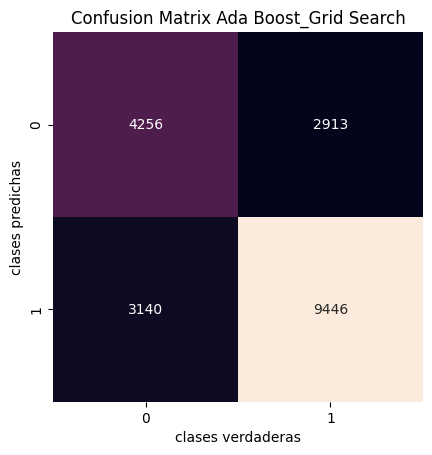

In [ ]:
#Matriz de confusión Grid Search sobre el modelo Ada Boost
mat_grid_ada = confusion_matrix(test3['status_binar'], y_pred_ada)
sns.heatmap(mat_grid_ada.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.title('Confusion Matrix Ada Boost_Grid Search')
plt.xlabel('clases verdaderas')
plt.ylabel('clases predichas');

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies Grid Search Ada Boost')
pd.DataFrame({'Attributes': ('NACIONAL','APARATOS','DELICTIVO','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal') ,
              'Ada Boost': best_ada.feature_importances_})

Feature Relevancies Grid Search Ada Boost


,Attributes,Ada Boost
0,NACIONAL,0.027950
1,APARATOS,0.005174
2,DELICTIVO,0.002326
3,GENERO,0.240815
4,EDAD,0.304477
5,delta_horas,0.082219
6,delta_horas_avistamiento,0.166329
7,region_ordinal,0.170709


**Gradient Boosting**

Se enfoca en reducir el error de tipo bias. Implica que ayuda a que el modelo aprenda mejor en el entrenamiento.
En esta técnica las clasificaciones erróneas incrementan sus pesos para la siguiente iteración hasta minimizar los errores.
Se destaca su versatilidad para cubrir varios tipos de tareas incluyendo los de supervivencia

A diferencia de Ada Boost en este algoritmo su estimador es de base fija

La ejecución de este algoritmo toma en promedio una hora y media

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_dist_gb = {
 "n_estimators": [64,128],#número de árboles a construir
 "max_depth": [9,7,2, None], # Máximo número de niveles en el arbol
 "min_samples_split": [64, 128], #  Número mínimo de muestras requeridas para dividir un nodo
 "min_samples_leaf": [14,16], # Número mínimo de muestras requeridas en cada nodo hoja
 "learning_rate" : [0.001,0.01],
  "max_features" : [1.0, "sqrt"],
 "loss" : ['log_loss','exponential'],
 "criterion": ['friedman_mse', 'squared_error']
 }
#si se usa Max_depth ya no hace falta definir max_leaf_nodes
grid_gb = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions = param_dist_gb, cv=5, n_iter=100)

grid_gb.fit(X = train3.drop(['status_binar'], axis=1),y = train3['status_binar'])

best_gb = grid_gb.best_estimator_
print (best_gb)
# fit and predict
best_gb.fit( X = train3.drop(['status_binar'], axis=1), y = train3['status_binar'])
y_pred_gb = best_gb.predict(X = test3.drop(['status_binar'], axis = 1))

# EVALUAR
accuracy_grid_gb = accuracy_score(test3['status_binar'], y_pred_gb)
precision_grid_gb = precision_score(test3['status_binar'], y_pred_gb)
print ('Accuracy', accuracy_grid_gb)
print ('Precision', precision_grid_gb)


GradientBoostingClassifier(criterion='squared_error', learning_rate=0.01,
                           max_depth=None, max_features='sqrt',
                           min_samples_leaf=14, min_samples_split=128,
                           n_estimators=128)
Accuracy 0.7472032396861554
Precision 0.7465354488853183


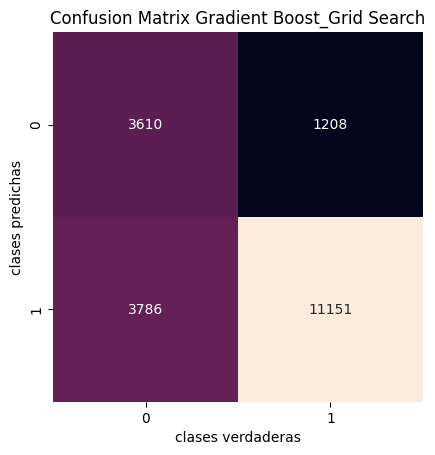

In [ ]:
#Matriz de confusión Grid Search sobre el modelo Gradient Boosting
mat_grid_gb = confusion_matrix(test3['status_binar'], y_pred_gb)
sns.heatmap(mat_grid_gb.T, square=True, annot=True, fmt='d', cbar=False
            )
plt.title('Confusion Matrix Gradient Boost_Grid Search')
plt.xlabel('clases verdaderas')
plt.ylabel('clases predichas');

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies Grid Search Gradient Boost')
pd.DataFrame({'Attributes': ('NACIONAL','APARATOS','DELICTIVO','GENERO','EDAD','delta_horas','delta_horas_avistamiento','region_ordinal') ,
              'Gradient Boost': best_gb.feature_importances_})

Feature Relevancies Grid Search Gradient Boost


,Attributes,Gradient Boost
0,NACIONAL,0.024076
1,APARATOS,0.017141
2,DELICTIVO,0.003163
3,GENERO,0.187640
4,EDAD,0.252100
5,delta_horas,0.133847
6,delta_horas_avistamiento,0.145775
7,region_ordinal,0.236258


A continuación se muestra un resumen de las métricas obtenidas en la aplicación de los conjuntos de modelos de árboles de decisión optimizados.
El criterio tomado para considerarlo como una característica relevante es superar el 10%

In [ ]:
metricas_arboles ={'Algoritmos Optimizados Grid Search':['Random Forest','Ada Boost','Gradient Boosting'],
                         'características relevantes':[5,4,5],
                         'Accuracy':[0.7499, 0.6936, 0.7472],
                         'Precision':[0.7661, 0.7505, 0.7465]}

df_metricas_arboles=pd.DataFrame(metricas_arboles)
df_metricas_arboles

,Algoritmos Optimizados Grid Search,características relevantes,Accuracy,Precision
0,Random Forest,5,0.7499,0.7661
1,Ada Boost,4,0.6936,0.7505
2,Gradient Boosting,5,0.7472,0.7465
